In [1683]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_profiling as pf

#to display all columns in the dataset
pd.pandas.set_option('display.max_columns',None)

In [1684]:
# data importing and understanding

In [1685]:
# fro the cust_data default sheetname = 0 has been taken while importing the excel file
cust_data = pd.read_excel('Case Study - Regression-Classificaiton-Segmentation_2.xlsx')

In [1686]:
# for the new_data sheetname = 1 has been mentioned while importing form the excel file
new_data = pd.read_excel('Case Study - Regression-Classificaiton-Segmentation_2.xlsx', sheet_name=1)

In [1687]:
profile_report = pf.ProfileReport(cust_data)

In [1688]:
# profile_report.to_file('profile_report.html')

In [1689]:
cust_data

,ID,FICO,Business_Revenue,TSR,Last_6M_Avg_Util,Income,Last_6M_Avg_Remit,Last_6M_Avg_Bal,Internal_Revolve,Lending_AR_pct_in_last_6M,ExternalBalance,Months_in_Business,preferred_spend_line,total_cards,preferred_bal_line,preavgremit1_3_all,External_rev_rate,Supplementary_Cards,isChargeCust,CMV,Assigned_Line
0,1,828.235294,0.138889,321.428571,625.911006,1.818182,1.081550,198.113469,NaN,58.632548,0.279273,100.083403,1.000000,1,1.000000,1.540594,NaN,1,0,100.104991,Low
1,2,911.764706,0.027778,NaN,611.574748,8.181818,1.344479,198.600020,22.086661,NaN,NaN,15.012510,NaN,1,NaN,1.614613,NaN,0,1,146.654045,High
2,3,962.352941,0.833333,35.714286,615.825381,8.181818,0.720796,197.267767,NaN,58.632548,0.453212,210.175146,10.000000,1,10.000000,1.044599,NaN,0,0,98.249570,Low
3,4,892.941176,NaN,NaN,638.076431,9.090909,0.820218,197.355744,4.363431,58.632548,NaN,NaN,NaN,1,NaN,1.145729,NaN,1,0,140.862306,Low
4,5,914.117647,0.083333,NaN,626.514988,5.181818,1.372928,198.790477,85.938202,58.632548,NaN,210.175146,NaN,.,NaN,1.558341,NaN,1,0,101.268503,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33995,33996,996.470588,0.833333,NaN,611.574748,9.090909,2.040273,199.590730,1.907932,NaN,1.837104,250.208507,13.333333,1,13.333333,1.913514,NaN,1,1,155.080895,Low
33996,33997,885.882353,NaN,NaN,617.448254,22.727273,0.943654,197.743580,4.902443,58.632548,NaN,5.004170,NaN,1,NaN,1.014169,NaN,0,0,162.972461,Low
33997,33998,976.470588,0.166667,35.714286,621.613105,18.181818,0.968569,197.437342,NaN,58.632548,1.172531,130.108424,2.000000,1,12.666667,1.228365,367.02,0,0,108.767642,Low
33998,33999,785.882353,0.177233,1000.000000,682.762351,NaN,0.623798,198.254389,9.359987,58.632548,8.072586,18.348624,11.866667,1,11.866667,0.976599,1000.00,0,0,101.471601,Low


In [1690]:
# insights from profile_report
# 'ID' is unique throughout the data hence it can be dropped
# 'TSR', 'Last_6M_Avg_Remit', 'preferred_spend_line' are dropped coz of high correlation with other variable.
# 'Internal_Revolve', 'External_rev_rate' can be dropped coz of high missings

In [1691]:
cust_data1 = cust_data.drop(columns=['ID', 'TSR', 'Last_6M_Avg_Remit', 'preferred_spend_line','Internal_Revolve', 'External_rev_rate'], axis=1)

In [1692]:
# data preperation - 1

In [1693]:
# 1. Renaming variable if required
cust_data1.columns

Index(['FICO', 'Business_Revenue', 'Last_6M_Avg_Util', 'Income',
       'Last_6M_Avg_Bal', 'Lending_AR_pct_in_last_6M', 'ExternalBalance',
       'Months_in_Business', 'total_cards', 'preferred_bal_line',
       'preavgremit1_3_all', 'Supplementary_Cards', 'isChargeCust', 'CMV',
       'Assigned_Line'],
      dtype='object')

In [1694]:
# all the variables names are appropriate, hence no need of renaming the variables

In [1695]:
# 2. Type casting of variables
cust_data1.dtypes

FICO                         float64
Business_Revenue             float64
Last_6M_Avg_Util             float64
Income                       float64
Last_6M_Avg_Bal              float64
Lending_AR_pct_in_last_6M    float64
ExternalBalance              float64
Months_in_Business           float64
total_cards                   object
preferred_bal_line           float64
preavgremit1_3_all           float64
Supplementary_Cards            int64
isChargeCust                   int64
CMV                          float64
Assigned_Line                 object
dtype: object

In [1696]:
cust_data1.total_cards.value_counts()

1      20816
2       7965
3       2796
4        910
0        756
.        273
5        269
6        117
7         31
8         26
10        14
12         9
9          8
15         2
11         2
14         1
104        1
18         1
20         1
22         1
23         1
Name: total_cards, dtype: int64

In [1697]:
# we found that total_cards has inappropriate data type, hence converting data type of total_cards
cust_data2 = cust_data1[cust_data1.total_cards!='.']

In [1698]:
cust_data2

,FICO,Business_Revenue,Last_6M_Avg_Util,Income,Last_6M_Avg_Bal,Lending_AR_pct_in_last_6M,ExternalBalance,Months_in_Business,total_cards,preferred_bal_line,preavgremit1_3_all,Supplementary_Cards,isChargeCust,CMV,Assigned_Line
0,828.235294,0.138889,625.911006,1.818182,198.113469,58.632548,0.279273,100.083403,1,1.000000,1.540594,1,0,100.104991,Low
1,911.764706,0.027778,611.574748,8.181818,198.600020,NaN,NaN,15.012510,1,NaN,1.614613,0,1,146.654045,High
2,962.352941,0.833333,615.825381,8.181818,197.267767,58.632548,0.453212,210.175146,1,10.000000,1.044599,0,0,98.249570,Low
3,892.941176,NaN,638.076431,9.090909,197.355744,58.632548,NaN,NaN,1,NaN,1.145729,1,0,140.862306,Low
5,794.117647,0.117700,624.065797,12.727273,197.251700,58.632548,0.139290,NaN,1,2.000000,1.037051,0,0,379.736661,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33995,996.470588,0.833333,611.574748,9.090909,199.590730,NaN,1.837104,250.208507,1,13.333333,1.913514,1,1,155.080895,Low
33996,885.882353,NaN,617.448254,22.727273,197.743580,58.632548,NaN,5.004170,1,NaN,1.014169,0,0,162.972461,Low
33997,976.470588,0.166667,621.613105,18.181818,197.437342,58.632548,1.172531,130.108424,1,12.666667,1.228365,0,0,108.767642,Low
33998,785.882353,0.177233,682.762351,NaN,198.254389,58.632548,8.072586,18.348624,1,11.866667,0.976599,0,0,101.471601,Low


In [1699]:
cust_data2 = cust_data2.reset_index()

In [1700]:
cust_data2.drop(['index'], axis=1, inplace=True)

In [1701]:
cust_data2['total_cards'] = cust_data2.total_cards.astype('int')

In [1702]:
cust_data2

,FICO,Business_Revenue,Last_6M_Avg_Util,Income,Last_6M_Avg_Bal,Lending_AR_pct_in_last_6M,ExternalBalance,Months_in_Business,total_cards,preferred_bal_line,preavgremit1_3_all,Supplementary_Cards,isChargeCust,CMV,Assigned_Line
0,828.235294,0.138889,625.911006,1.818182,198.113469,58.632548,0.279273,100.083403,1,1.000000,1.540594,1,0,100.104991,Low
1,911.764706,0.027778,611.574748,8.181818,198.600020,NaN,NaN,15.012510,1,NaN,1.614613,0,1,146.654045,High
2,962.352941,0.833333,615.825381,8.181818,197.267767,58.632548,0.453212,210.175146,1,10.000000,1.044599,0,0,98.249570,Low
3,892.941176,NaN,638.076431,9.090909,197.355744,58.632548,NaN,NaN,1,NaN,1.145729,1,0,140.862306,Low
4,794.117647,0.117700,624.065797,12.727273,197.251700,58.632548,0.139290,NaN,1,2.000000,1.037051,0,0,379.736661,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33722,996.470588,0.833333,611.574748,9.090909,199.590730,NaN,1.837104,250.208507,1,13.333333,1.913514,1,1,155.080895,Low
33723,885.882353,NaN,617.448254,22.727273,197.743580,58.632548,NaN,5.004170,1,NaN,1.014169,0,0,162.972461,Low
33724,976.470588,0.166667,621.613105,18.181818,197.437342,58.632548,1.172531,130.108424,1,12.666667,1.228365,0,0,108.767642,Low
33725,785.882353,0.177233,682.762351,NaN,198.254389,58.632548,8.072586,18.348624,1,11.866667,0.976599,0,0,101.471601,Low


In [1703]:
cust_data2.dtypes

FICO                         float64
Business_Revenue             float64
Last_6M_Avg_Util             float64
Income                       float64
Last_6M_Avg_Bal              float64
Lending_AR_pct_in_last_6M    float64
ExternalBalance              float64
Months_in_Business           float64
total_cards                    int32
preferred_bal_line           float64
preavgremit1_3_all           float64
Supplementary_Cards            int64
isChargeCust                   int64
CMV                          float64
Assigned_Line                 object
dtype: object

In [1704]:
# all the variables datatype is appropriate now

In [1705]:
# 3. Removing duplicates
cust_data2.duplicated().sum()

0

In [1706]:
# we can see that there are no duplicates available in the data

In [1707]:
# 4. handling missing data

In [1708]:
cust_data2.isnull().sum()

FICO                           960
Business_Revenue              3349
Last_6M_Avg_Util                 1
Income                        3469
Last_6M_Avg_Bal                589
Lending_AR_pct_in_last_6M     4537
ExternalBalance               7404
Months_in_Business           10374
total_cards                      0
preferred_bal_line            7861
preavgremit1_3_all             620
Supplementary_Cards              0
isChargeCust                     0
CMV                              0
Assigned_Line                    0
dtype: int64

In [1709]:
def missing_treat(x):
    if ((x.dtype == 'float') or (x.dtype == 'int')) :
        x = x.fillna(x.median())
    elif ((x.dtype == 'object') or (x.dtype == 'O')):
        x = x.fillna(x.mode()[0])
    else:
        x = x
    return x 

In [1710]:
cust_data2 = cust_data2.apply(missing_treat)

In [1711]:
cust_data2.isnull().sum()

FICO                         0
Business_Revenue             0
Last_6M_Avg_Util             0
Income                       0
Last_6M_Avg_Bal              0
Lending_AR_pct_in_last_6M    0
ExternalBalance              0
Months_in_Business           0
total_cards                  0
preferred_bal_line           0
preavgremit1_3_all           0
Supplementary_Cards          0
isChargeCust                 0
CMV                          0
Assigned_Line                0
dtype: int64

In [1712]:
# missing values has been taken care

In [1713]:
# describing the data to understand insights
cust_data2.describe()

,FICO,Business_Revenue,Last_6M_Avg_Util,Income,Last_6M_Avg_Bal,Lending_AR_pct_in_last_6M,ExternalBalance,Months_in_Business,total_cards,preferred_bal_line,preavgremit1_3_all,Supplementary_Cards,isChargeCust,CMV
count,33727.000000,33727.000000,33727.000000,33727.000000,33727.000000,33727.000000,33727.000000,33727.000000,33727.000000,33727.000000,33727.000000,33727.000000,33727.000000,33727.000000
mean,917.859875,1.026690,631.724492,14.779407,199.971748,56.846377,4.700060,105.950880,1.536425,11.891497,2.077374,0.400718,0.299849,161.305506
std,49.354066,12.110115,30.934017,27.729594,11.190953,6.407400,10.210488,101.924172,1.138161,10.645949,7.981441,0.685740,0.458198,123.234182
min,730.588235,0.001333,347.053355,0.005000,0.000000,13.028620,0.000693,0.834028,0.000000,0.133333,0.959315,0.000000,0.000000,0.000000
25%,883.529412,0.083333,611.760319,6.818182,197.205521,58.632548,0.935530,40.033361,1.000000,7.333333,1.043628,0.000000,0.000000,104.367470
50%,924.705882,0.166667,619.973600,10.000000,197.912714,58.632548,2.095588,80.066722,1.000000,10.000000,1.262859,0.000000,0.000000,117.466437
75%,956.470588,0.444444,637.652768,16.363636,199.641471,58.632548,4.414317,130.108424,2.000000,13.333333,1.808311,1.000000,1.000000,159.376936
max,1000.000000,1000.000000,1000.000000,909.090818,1000.000000,1000.000000,824.334457,1000.000000,104.000000,775.000000,1000.000000,14.000000,1.000000,1000.000000


In [1714]:
# 5. Handling Outliers

In [1715]:
def outlier_treat(x):
    if ((x.dtype=='int') | (x.dtype=='float')):
        x = x.clip(lower=x.quantile(0.03), upper=x.quantile(0.97))
    else:
        x = x
    return x

In [1716]:
cust_data2 = cust_data2.apply(outlier_treat)

In [1717]:
cust_data2.describe()

,FICO,Business_Revenue,Last_6M_Avg_Util,Income,Last_6M_Avg_Bal,Lending_AR_pct_in_last_6M,ExternalBalance,Months_in_Business,total_cards,preferred_bal_line,preavgremit1_3_all,Supplementary_Cards,isChargeCust,CMV
count,33727.000000,33727.000000,33727.000000,33727.000000,33727.000000,33727.000000,33727.000000,33727.000000,33727.000000,33727.000000,33727.000000,33727.000000,33727.000000,33727.000000
mean,918.296669,0.541676,630.702826,12.829254,199.278135,56.812222,4.181506,102.612739,1.525958,11.465065,1.706938,0.400718,0.299849,156.339021
std,47.841603,0.917800,26.366436,9.256066,3.525366,3.756054,5.663701,88.121511,0.814333,6.601984,1.143522,0.685740,0.458198,97.413131
min,815.294118,0.027778,611.574748,2.727273,196.911295,47.899686,0.051128,5.004170,1.000000,2.000000,0.959315,0.000000,0.000000,81.574320
25%,883.529412,0.083333,611.760319,6.818182,197.205521,58.632548,0.935530,40.033361,1.000000,7.333333,1.043628,0.000000,0.000000,104.367470
50%,924.705882,0.166667,619.973600,10.000000,197.912714,58.632548,2.095588,80.066722,1.000000,10.000000,1.262859,0.000000,0.000000,117.466437
75%,956.470588,0.444444,637.652768,16.363636,199.641471,58.632548,4.414317,130.108424,2.000000,13.333333,1.808311,1.000000,1.000000,159.376936
max,995.294118,4.166667,718.899737,45.454545,212.684546,58.632548,24.675697,360.300250,4.000000,32.266667,6.129356,14.000000,1.000000,521.560069


In [1718]:
# 6. Encoding variables

In [1719]:
cust_data2.Assigned_Line.value_counts() # these values are ordinal in nature and hence will use ordinal encoding 

Low     30014
High     3713
Name: Assigned_Line, dtype: int64

In [1720]:
cust_data2['Assigned_Line'] = np.where(cust_data2.Assigned_Line=='Low',1,2)

In [1721]:
# completely processed final data
cust_data2.head()

,FICO,Business_Revenue,Last_6M_Avg_Util,Income,Last_6M_Avg_Bal,Lending_AR_pct_in_last_6M,ExternalBalance,Months_in_Business,total_cards,preferred_bal_line,preavgremit1_3_all,Supplementary_Cards,isChargeCust,CMV,Assigned_Line
0,828.235294,0.138889,625.911006,2.727273,198.113469,58.632548,0.279273,100.083403,1,2.0,1.540594,1,0,100.104991,1
1,911.764706,0.027778,611.574748,8.181818,198.600020,58.632548,2.095588,15.012510,1,10.0,1.614613,0,1,146.654045,2
2,962.352941,0.833333,615.825381,8.181818,197.267767,58.632548,0.453212,210.175146,1,10.0,1.044599,0,0,98.249570,1
3,892.941176,0.166667,638.076431,9.090909,197.355744,58.632548,2.095588,80.066722,1,10.0,1.145729,1,0,140.862306,1
4,815.294118,0.117700,624.065797,12.727273,197.251700,58.632548,0.139290,80.066722,1,2.0,1.037051,0,0,379.736661,1


In [1722]:
# taking a copy of cust_data2 as cleaned data for regression problem
cleaned_data = cust_data2.copy()

In [1723]:
cleaned_data.head()

,FICO,Business_Revenue,Last_6M_Avg_Util,Income,Last_6M_Avg_Bal,Lending_AR_pct_in_last_6M,ExternalBalance,Months_in_Business,total_cards,preferred_bal_line,preavgremit1_3_all,Supplementary_Cards,isChargeCust,CMV,Assigned_Line
0,828.235294,0.138889,625.911006,2.727273,198.113469,58.632548,0.279273,100.083403,1,2.0,1.540594,1,0,100.104991,1
1,911.764706,0.027778,611.574748,8.181818,198.600020,58.632548,2.095588,15.012510,1,10.0,1.614613,0,1,146.654045,2
2,962.352941,0.833333,615.825381,8.181818,197.267767,58.632548,0.453212,210.175146,1,10.0,1.044599,0,0,98.249570,1
3,892.941176,0.166667,638.076431,9.090909,197.355744,58.632548,2.095588,80.066722,1,10.0,1.145729,1,0,140.862306,1
4,815.294118,0.117700,624.065797,12.727273,197.251700,58.632548,0.139290,80.066722,1,2.0,1.037051,0,0,379.736661,1


### using cleaned_data for Regression :

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CMV', ylabel='Density'>

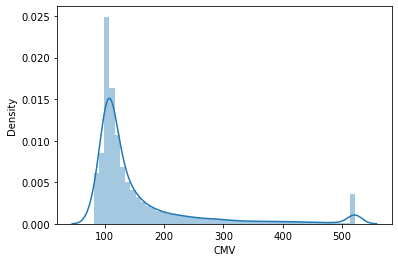

In [1724]:
# assumptions for regression model
# 1. Y variable should follow normal distribution
sns.distplot(cleaned_data.CMV)

In [1725]:
# we can see that skewness is very high, hence will apply log transformation

C:\Users\PANDA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CMV', ylabel='Density'>

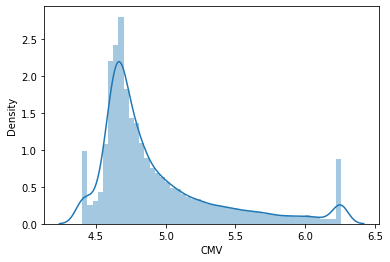

In [1726]:
sns.distplot(np.log(cleaned_data.CMV))

In [1727]:
cleaned_data['ln_CMV'] = np.log(cleaned_data.CMV)

In [1728]:
del cleaned_data['CMV']

In [1729]:
cleaned_data.head()

,FICO,Business_Revenue,Last_6M_Avg_Util,Income,Last_6M_Avg_Bal,Lending_AR_pct_in_last_6M,ExternalBalance,Months_in_Business,total_cards,preferred_bal_line,preavgremit1_3_all,Supplementary_Cards,isChargeCust,Assigned_Line,ln_CMV
0,828.235294,0.138889,625.911006,2.727273,198.113469,58.632548,0.279273,100.083403,1,2.0,1.540594,1,0,1,4.606220
1,911.764706,0.027778,611.574748,8.181818,198.600020,58.632548,2.095588,15.012510,1,10.0,1.614613,0,1,2,4.988076
2,962.352941,0.833333,615.825381,8.181818,197.267767,58.632548,0.453212,210.175146,1,10.0,1.044599,0,0,1,4.587511
3,892.941176,0.166667,638.076431,9.090909,197.355744,58.632548,2.095588,80.066722,1,10.0,1.145729,1,0,1,4.947783
4,815.294118,0.117700,624.065797,12.727273,197.251700,58.632548,0.139290,80.066722,1,2.0,1.037051,0,0,1,5.939478


In [1730]:
# 2.checking correlation betweem X & Y
cleaned_data.corrwith(cleaned_data.ln_CMV)

FICO                        -0.087267
Business_Revenue             0.105394
Last_6M_Avg_Util             0.241162
Income                       0.156227
Last_6M_Avg_Bal              0.313330
Lending_AR_pct_in_last_6M   -0.014994
ExternalBalance              0.068985
Months_in_Business          -0.096276
total_cards                  0.008208
preferred_bal_line           0.026046
preavgremit1_3_all           0.300479
Supplementary_Cards          0.107980
isChargeCust                 0.103644
Assigned_Line                0.014273
ln_CMV                       1.000000
dtype: float64

In [1731]:
# 3.checking correlation between X & X
corr_matrix = cleaned_data.corr()

<AxesSubplot:>

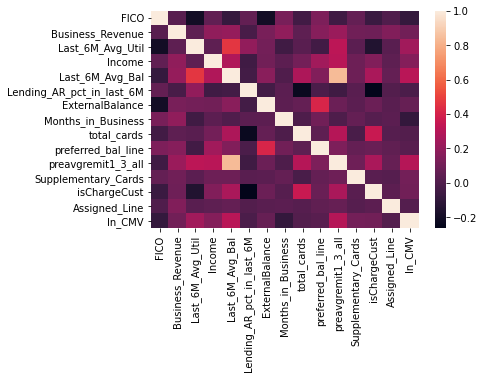

In [1732]:
sns.heatmap(corr_matrix)

In [1733]:
# feature reduction

In [1734]:
cleaned_data.shape

(33727, 15)

In [1735]:
features = cleaned_data[cleaned_data.columns.difference(['ln_CMV'])]
target = cleaned_data.ln_CMV

In [1736]:
# F-Regression
from sklearn.feature_selection import f_regression

In [1737]:
F_values, P_values = f_regression(features, target)

In [1738]:
F_values

array([6.87189463e+00, 3.78820145e+02, 1.61262950e+02, 2.58804009e+02,
       8.43713137e+02, 3.67141071e+03, 2.08253177e+03, 7.58371426e+00,
       3.15521275e+02, 3.97864693e+02, 3.66211526e+02, 3.34715205e+03,
       2.28935058e+01, 2.27228407e+00])

In [1739]:
P_values

array([8.76010704e-003, 6.49865233e-084, 7.28123083e-037, 5.14527274e-058,
       3.07549781e-183, 0.00000000e+000, 0.00000000e+000, 5.89294939e-003,
       2.86431497e-070, 5.17551973e-088, 3.37341204e-081, 0.00000000e+000,
       1.71953036e-006, 1.31715035e-001])

In [1740]:
f_reg_results = pd.concat([pd.Series(features.columns), pd.Series(F_values), pd.Series(P_values)], axis=1)

In [1741]:
f_reg_results.columns = ['features','F_value','P_value']

In [1742]:
f_reg_results_new = f_reg_results.sort_values(by='P_value', ascending=True).head(10)

In [1743]:
f_reg_results_new

,features,F_value,P_value
5,Last_6M_Avg_Bal,3671.410709,0.000000e+00
6,Last_6M_Avg_Util,2082.531773,0.000000e+00
11,preavgremit1_3_all,3347.152054,0.000000e+00
4,Income,843.713137,3.075498e-183
9,Supplementary_Cards,397.864693,5.175520e-88
1,Business_Revenue,378.820145,6.498652e-84
10,isChargeCust,366.211526,3.373412e-81
8,Months_in_Business,315.521275,2.864315e-70
3,FICO,258.804009,5.145273e-58
2,ExternalBalance,161.262950,7.281231e-37


In [1744]:
f_reg_imp_vars = list(f_reg_results_new.features)

In [1745]:
# important feaatures selected by f_regression

f_reg_imp_vars

['Last_6M_Avg_Bal',
 'Last_6M_Avg_Util',
 'preavgremit1_3_all',
 'Income',
 'Supplementary_Cards',
 'Business_Revenue',
 'isChargeCust',
 'Months_in_Business',
 'FICO',
 'ExternalBalance']

In [1746]:
# RFE
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

In [1747]:
rfe = RFE(RandomForestRegressor(), n_features_to_select=10)
rfe = rfe.fit(features, target )
rfe.support_

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True, False])

In [1748]:
RFE_imp_vars = features.columns[rfe.support_]

In [1749]:
# important features selected by RFE

list(RFE_imp_vars)

['Business_Revenue',
 'ExternalBalance',
 'FICO',
 'Income',
 'Last_6M_Avg_Bal',
 'Last_6M_Avg_Util',
 'Lending_AR_pct_in_last_6M',
 'Months_in_Business',
 'preavgremit1_3_all',
 'preferred_bal_line']

In [1750]:
# SelectKBest
from sklearn.feature_selection import SelectKBest, f_classif

In [1751]:
selector=SelectKBest(f_classif,k=10).fit(features,target)

In [1752]:
K_Best_10=features.columns[selector.get_support()]

In [1753]:
# important features selected by KBest

list(K_Best_10)

['ExternalBalance',
 'FICO',
 'Income',
 'Last_6M_Avg_Bal',
 'Last_6M_Avg_Util',
 'Lending_AR_pct_in_last_6M',
 'Supplementary_Cards',
 'isChargeCust',
 'preavgremit1_3_all',
 'total_cards']

In [1754]:
# Corr between X and Y

In [1755]:
col_names = pd.Series(list(features.corrwith(target).index),name="Column_Names")

In [1756]:
R_values = pd.Series(list(features.corrwith(target)),name="R_Values")

In [1757]:
corr = pd.concat([col_names,R_values],axis=1)

In [1758]:
corr["abs_R_values"]=np.abs(corr.R_Values)

In [1759]:
corr_12 = corr.sort_values(by=["abs_R_values"],ascending=False).head(10)

In [1760]:
# important features selected by correlation

list(corr_12.Column_Names)

['Last_6M_Avg_Bal',
 'preavgremit1_3_all',
 'Last_6M_Avg_Util',
 'Income',
 'Supplementary_Cards',
 'Business_Revenue',
 'isChargeCust',
 'Months_in_Business',
 'FICO',
 'ExternalBalance']

In [1761]:
final_features = list(set(list(f_reg_results_new.features)+list(RFE_imp_vars)+list(K_Best_10)+list(corr_12.Column_Names)))

In [1762]:
final_features

['ExternalBalance',
 'Lending_AR_pct_in_last_6M',
 'Business_Revenue',
 'total_cards',
 'Last_6M_Avg_Util',
 'FICO',
 'preferred_bal_line',
 'Income',
 'preavgremit1_3_all',
 'isChargeCust',
 'Months_in_Business',
 'Supplementary_Cards',
 'Last_6M_Avg_Bal']

In [1763]:
# vif - (multicolinieity)
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1764]:
features_new = cleaned_data[cleaned_data[final_features].columns.difference(['ln_CMV','Last_6M_Avg_Bal','Last_6M_Avg_Util','FICO'])]

In [1765]:
vif_values = pd.Series([variance_inflation_factor(features_new.values, exog_idx= i) for i in range(0, len(features_new.columns))])

In [1766]:
vif_values1 = pd.concat([pd.Series(features_new.columns), vif_values], axis=1)

In [1767]:
vif_values1.columns = ['feature', 'vif']

In [1768]:
vif_values1.sort_values(by='vif', ascending=False)

,feature,vif
3,Lending_AR_pct_in_last_6M,8.825372
9,total_cards,5.290120
8,preferred_bal_line,5.154086
7,preavgremit1_3_all,4.143810
2,Income,3.438270
4,Months_in_Business,2.482494
1,ExternalBalance,1.879394
6,isChargeCust,1.725830
0,Business_Revenue,1.526870
5,Supplementary_Cards,1.375509


In [1769]:
data_selected = pd.concat([features_new, target], axis=1)

In [1770]:
# split data into train & test
from sklearn.model_selection import train_test_split

In [1771]:
train, test = train_test_split(data_selected, test_size=0.3, random_state=123)

In [1772]:
train.shape

(23608, 11)

In [1773]:
test.shape

(10119, 11)

In [1774]:
# model building
import statsmodels.formula.api as smf

In [1775]:
eqn = 'ln_CMV~'+'+'.join(train.columns.difference(['ln_CMV','Lending_AR_pct_in_last_6M']))
eqn

'ln_CMV~Business_Revenue+ExternalBalance+Income+Months_in_Business+Supplementary_Cards+isChargeCust+preavgremit1_3_all+preferred_bal_line+total_cards'

In [1776]:
ols_model = smf.ols(eqn, data=train).fit()

In [1777]:
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 ln_CMV   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     386.1
Date:                Sun, 12 Sep 2021   Prob (F-statistic):               0.00
Time:                        02:12:41   Log-Likelihood:                -12487.
No. Observations:               23608   AIC:                         2.499e+04
Df Residuals:                   23598   BIC:                         2.507e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               4.8184    

In [1778]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [1779]:
# predicting values for train data

pred_ln_CMV = ols_model.predict(train)
pred_train = np.exp(pred_ln_CMV)
actual_train = np.exp(train.ln_CMV)

In [1780]:
# predicting values for test data

pred_ln_CMV = ols_model.predict(test)
pred_test = np.exp(pred_ln_CMV)
actual_test = np.exp(test.ln_CMV)

In [1781]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(actual_train -pred_train)/actual_train)
print(MAPE_train)
MAPE_test = np.mean(np.abs(actual_test- pred_test)/actual_test)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_train = np.sqrt(mean_squared_error(actual_train,pred_train))
print(RMSE_train)
RMSE_test =np.sqrt(mean_squared_error(actual_test,pred_test))
print(RMSE_test)


MAPE values for training and testing data :
0.2880975114607767
0.2894487540660652

RMSE values for training and testing data :
93.08551335700511
93.7490107288819


In [1782]:
# Since we can see that due to less variable the traditional linear model is having underfitting issue
# will choose machine learning technique Grdient boost or XGBoost coz these two techniques can take care of underfitting issue

In [1783]:
x = data_selected[data_selected.columns.difference(['ln_CMV'])]
y = data_selected.ln_CMV

In [1784]:
#Considering Significant Variables for Machine Learning algorithms
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.3, random_state=123)

In [1785]:
train_x

,Business_Revenue,ExternalBalance,Income,Lending_AR_pct_in_last_6M,Months_in_Business,Supplementary_Cards,isChargeCust,preavgremit1_3_all,preferred_bal_line,total_cards
29402,0.050000,0.085237,2.727273,58.632548,200.166806,0,0,1.220543,2.000000,2
22773,0.066667,0.944539,13.636364,58.334174,80.066722,0,0,1.156862,8.000000,3
2054,0.027778,0.167009,9.090909,58.579957,5.004170,0,0,2.046869,9.333333,4
18718,0.027778,0.727635,18.181818,57.697715,80.066722,0,1,1.344803,23.333333,4
19408,0.083333,0.246703,3.909091,50.531384,80.066722,0,1,3.386516,8.000000,2
...,...,...,...,...,...,...,...,...,...,...
7763,0.388889,4.079605,18.181818,58.632548,210.175146,1,1,1.214677,10.000000,2
15377,0.138889,6.582668,45.454545,53.061119,210.175146,0,1,2.046509,6.666667,2
17730,0.083333,3.015179,8.181818,47.899686,15.012510,0,0,0.959315,8.666667,1
28030,0.194444,2.212009,11.363636,58.632548,5.004170,1,1,1.528790,16.000000,2


In [1786]:
train_x.shape

(23608, 10)

In [1787]:
train_y.shape

(23608,)

In [1788]:
test_x.shape

(10119, 10)

In [1789]:
test_y.shape

(10119,)

In [1790]:
# Gradient boost
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [1791]:
# tuning parameters

grid = {'n_estimators':[60,70,80,100], 'learning_rate':[10**x for x in range(-4,2)], 'max_depth':[2,3,4,5]}

In [1792]:
gd_model = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=grid, cv=3,  n_jobs=-1, verbose=True)

In [1793]:
gd_model = gd_model.fit(train_x, train_y)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:  2.0min finished
C:\Users\PANDA\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: RuntimeWarning: overflow encountered in square
  array_stds = np.sqrt(np.average((array -


In [1794]:
gd_model.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [1795]:
gd_model_final = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

In [1796]:
gd_model_final = gd_model_final.fit(train_x, train_y)

In [1797]:
#Predicting values for both training and testing data sets
gbm_train_pred=gd_model_final.predict(train_x)
gbm_test_pred=gd_model_final.predict(test_x)

In [1798]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y - gbm_train_pred)/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- gbm_test_pred)/test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_train = np.sqrt(mean_squared_error(train_y,gbm_train_pred))
print(RMSE_train)
RMSE_test =np.sqrt(mean_squared_error(test_y,gbm_test_pred))
print(RMSE_test)


MAPE values for training and testing data :
0.05638177347812923
0.057349423343214086

RMSE values for training and testing data :
0.39646061668504906
0.4044283211076765


In [1799]:
# trying with XGBoost

# !pip install xgboost ------> we have to install xgboost if not already install on machine

from xgboost import XGBRegressor

In [1800]:
# tuning parameters

s_grid = {'learning_rate':[0.01,0.05,0.1], 'n_estimators':[100,200,300]}

In [1801]:
xgb_model = GridSearchCV(estimator=XGBRegressor(), param_grid=s_grid, cv=5, n_jobs=-1, verbose=True)

In [1802]:
xgb_model = xgb_model.fit(train_x, train_y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   58.8s finished


In [1803]:
xgb_model.best_params_

{'learning_rate': 0.05, 'n_estimators': 100}

In [1804]:
xgb_model.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [1805]:
xgb_model_final = XGBRegressor(n_estimators=100, learning_rate=0.05)

In [1806]:
xgb_model_final = xgb_model_final.fit(train_x, train_y)

In [1807]:
#Predicting values for both training and testing data sets
xg_train_pred=xgb_model_final.predict(train_x)
xg_test_pred=xgb_model_final.predict(test_x)

In [1808]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y - xg_train_pred)/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- xg_test_pred)/test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_train = np.sqrt(mean_squared_error(train_y,xg_train_pred))
print(RMSE_train)
RMSE_test =np.sqrt(mean_squared_error(test_y,xg_test_pred))
print(RMSE_test)


MAPE values for training and testing data :
0.05245462936136659
0.05556554034866457

RMSE values for training and testing data :
0.38172683020884934
0.4061995918912978


In [1809]:
# based on the results will choose Gradient Boost model for the prediction purpose
# saving model
import pickle

# now you can save it to a file
with open('gd_model_final.pkl', 'wb') as f:
    pickle.dump(gd_model_final, f)

In [1810]:
# will use new_data for the predicion 
# before predicting the values we need to process the new_data
new_data.head()

,ID,FICO,Business Revenue,TSR,Last 6M Avg Util,Income,Last 6M Avg Remit,Last 6M Avg Bal,Internal Revolve,Lending AR% in last 6M,ExternalBalance,Months in Business,preferred_spend_line,total_cards,preferred_bal_line,preavgremit1_3_all,External_rev_rate,Supplementary Cards,isChargeCust,CMV
0,1,878.823529,0.833333,821.428571,620.835806,5.181818,0.833974,197.500187,NaN,58.632548,9.433609,40.033361,10.000000,2,10.000000,1.212784,1000.00,1,0,48.099828
1,2,891.764706,0.138889,357.142857,614.092215,3.909091,0.595187,197.016843,253.896073,58.632548,10.144612,NaN,5.666667,1,7.600000,1.004907,992.55,0,0,104.018933
2,3,955.294118,0.055556,NaN,611.574748,6.363636,0.918652,197.660051,22.086661,NaN,0.583494,NaN,6.000000,1,6.000000,1.157115,NaN,1,1,120.586919
3,4,831.764706,0.111111,250.000000,617.740617,6.545455,2.383924,200.526288,NaN,48.539365,NaN,NaN,NaN,3,NaN,2.350858,NaN,0,1,168.592083
4,5,957.647059,0.166667,NaN,623.426802,NaN,0.711240,197.151458,5.013668,49.379748,0.255712,NaN,13.333333,1,13.333333,1.171551,NaN,0,1,109.204819


In [1811]:
# new data doesnot have the appropirate naming, so renaming the variables
new_data.columns = [x.replace(' ','_') for x in new_data.columns] 

In [1812]:
new_data.columns

Index(['ID', 'FICO', 'Business_Revenue', 'TSR', 'Last_6M_Avg_Util', 'Income',
       'Last_6M_Avg_Remit', 'Last_6M_Avg_Bal', 'Internal_Revolve',
       'Lending_AR%_in_last_6M', 'ExternalBalance', 'Months_in_Business',
       'preferred_spend_line', 'total_cards', 'preferred_bal_line',
       'preavgremit1_3_all', 'External_rev_rate', 'Supplementary_Cards',
       'isChargeCust', 'CMV'],
      dtype='object')

In [1813]:
new_data.rename(columns={'Lending_AR%_in_last_6M':'Lending_AR_pct_in_last_6M'}, inplace=True)

In [1814]:
new_data = new_data.drop(columns=['ID', 'TSR', 'Last_6M_Avg_Remit', 'preferred_spend_line', 'Internal_Revolve', 'External_rev_rate'], axis=1)

In [1815]:
new_data.total_cards.value_counts()

1     6165
2     2349
3      818
4      253
0      194
5       85
.       66
6       39
7       11
8       10
10       4
9        2
20       1
18       1
15       1
12       1
Name: total_cards, dtype: int64

In [1816]:
# we found that total_cards has inappropriate data type, hence converting data type of total_cards
new_data = new_data[new_data.total_cards!='.']

In [1817]:
new_data

,FICO,Business_Revenue,Last_6M_Avg_Util,Income,Last_6M_Avg_Bal,Lending_AR_pct_in_last_6M,ExternalBalance,Months_in_Business,total_cards,preferred_bal_line,preavgremit1_3_all,Supplementary_Cards,isChargeCust,CMV
0,878.823529,0.833333,620.835806,5.181818,197.500187,58.632548,9.433609,40.033361,2,10.000000,1.212784,1,0,48.099828
1,891.764706,0.138889,614.092215,3.909091,197.016843,58.632548,10.144612,NaN,1,7.600000,1.004907,0,0,104.018933
2,955.294118,0.055556,611.574748,6.363636,197.660051,NaN,0.583494,NaN,1,6.000000,1.157115,1,1,120.586919
3,831.764706,0.111111,617.740617,6.545455,200.526288,48.539365,NaN,NaN,3,NaN,2.350858,0,1,168.592083
4,957.647059,0.166667,623.426802,NaN,197.151458,49.379748,0.255712,NaN,1,13.333333,1.171551,0,1,109.204819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,958.823529,4.444444,623.638633,68.181818,197.417113,58.632548,2.125386,450.375313,1,33.333333,1.161971,3,0,105.225473
9996,817.647059,0.256078,699.178409,18.181818,207.160651,49.823015,6.159254,70.058382,2,5.533333,8.237867,0,1,114.672978
9997,960.000000,NaN,633.188553,13.636364,199.629779,58.632548,NaN,218.515430,3,NaN,1.011953,0,0,113.297763
9998,938.823529,0.166667,615.121610,11.363636,198.119869,50.541044,0.183641,40.033361,3,10.000000,1.508269,1,1,125.161790


In [1818]:
new_data = new_data.reset_index()

In [1819]:
new_data.drop(['index'], axis=1, inplace=True)

In [1820]:
new_data['total_cards'] = new_data.total_cards.astype('int')

In [1821]:
new_data

,FICO,Business_Revenue,Last_6M_Avg_Util,Income,Last_6M_Avg_Bal,Lending_AR_pct_in_last_6M,ExternalBalance,Months_in_Business,total_cards,preferred_bal_line,preavgremit1_3_all,Supplementary_Cards,isChargeCust,CMV
0,878.823529,0.833333,620.835806,5.181818,197.500187,58.632548,9.433609,40.033361,2,10.000000,1.212784,1,0,48.099828
1,891.764706,0.138889,614.092215,3.909091,197.016843,58.632548,10.144612,NaN,1,7.600000,1.004907,0,0,104.018933
2,955.294118,0.055556,611.574748,6.363636,197.660051,NaN,0.583494,NaN,1,6.000000,1.157115,1,1,120.586919
3,831.764706,0.111111,617.740617,6.545455,200.526288,48.539365,NaN,NaN,3,NaN,2.350858,0,1,168.592083
4,957.647059,0.166667,623.426802,NaN,197.151458,49.379748,0.255712,NaN,1,13.333333,1.171551,0,1,109.204819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9929,958.823529,4.444444,623.638633,68.181818,197.417113,58.632548,2.125386,450.375313,1,33.333333,1.161971,3,0,105.225473
9930,817.647059,0.256078,699.178409,18.181818,207.160651,49.823015,6.159254,70.058382,2,5.533333,8.237867,0,1,114.672978
9931,960.000000,NaN,633.188553,13.636364,199.629779,58.632548,NaN,218.515430,3,NaN,1.011953,0,0,113.297763
9932,938.823529,0.166667,615.121610,11.363636,198.119869,50.541044,0.183641,40.033361,3,10.000000,1.508269,1,1,125.161790


In [1822]:
# all the variables datatype is appropriate now

In [1823]:
# 3. Removing duplicates
new_data.duplicated().sum()

0

In [1824]:
# we can see that there are no duplicates available in the data

In [1825]:
# 4. handling missing data

In [1826]:
new_data.isnull().sum()

FICO                          267
Business_Revenue              926
Last_6M_Avg_Util                0
Income                       1050
Last_6M_Avg_Bal               159
Lending_AR_pct_in_last_6M    1344
ExternalBalance              2189
Months_in_Business           3174
total_cards                     0
preferred_bal_line           2317
preavgremit1_3_all            173
Supplementary_Cards             0
isChargeCust                    0
CMV                             0
dtype: int64

In [1827]:
def missing_treat(x):
    if ((x.dtype == 'float') or (x.dtype == 'int')) :
        x = x.fillna(x.median())
    elif ((x.dtype == 'object') or (x.dtype == 'O')):
        x = x.fillna(x.mode()[0])
    else:
        x = x
    return x 

In [1828]:
new_data = new_data.apply(missing_treat)

In [1829]:
new_data.isnull().sum()

FICO                         0
Business_Revenue             0
Last_6M_Avg_Util             0
Income                       0
Last_6M_Avg_Bal              0
Lending_AR_pct_in_last_6M    0
ExternalBalance              0
Months_in_Business           0
total_cards                  0
preferred_bal_line           0
preavgremit1_3_all           0
Supplementary_Cards          0
isChargeCust                 0
CMV                          0
dtype: int64

In [1830]:
# describing the data to understand insights
new_data.describe()

,FICO,Business_Revenue,Last_6M_Avg_Util,Income,Last_6M_Avg_Bal,Lending_AR_pct_in_last_6M,ExternalBalance,Months_in_Business,total_cards,preferred_bal_line,preavgremit1_3_all,Supplementary_Cards,isChargeCust,CMV
count,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000
mean,918.202016,1.121162,631.498193,14.667538,199.883215,56.776971,4.622969,103.696322,1.536944,12.133801,1.980434,0.401450,0.303906,160.871104
std,49.846614,12.657048,30.955855,29.347938,8.475610,3.840416,12.991737,100.209278,0.996720,15.122060,3.873335,0.717882,0.459966,121.898605
min,725.882353,0.001333,295.765648,0.008727,191.443507,2.101494,0.000693,0.834028,0.000000,0.054000,0.959315,0.000000,0.000000,0.000000
25%,883.529412,0.083333,611.756818,6.818182,197.200394,58.632548,0.982133,40.033361,1.000000,7.333333,1.041660,0.000000,0.000000,104.430723
50%,925.882353,0.166667,619.928082,10.090909,197.904625,58.632548,2.105289,80.066722,1.000000,10.166667,1.267686,0.000000,0.000000,117.525818
75%,956.470588,0.444444,637.460632,16.545455,199.590701,58.632548,4.345538,130.108424,2.000000,13.666667,1.815523,1.000000,1.000000,159.908778
max,1000.000000,1000.000000,957.849053,909.090818,475.687040,93.177335,1000.000000,990.825688,20.000000,1000.000000,187.777811,23.000000,1.000000,1000.000000


In [1831]:
# 5. Handling Outliers

In [1832]:
def outlier_treat(x):
    if ((x.dtype=='int') | (x.dtype=='float')):
        x = x.clip(lower=x.quantile(0.03), upper=x.quantile(0.97))
    else:
        x = x
    return x

In [1833]:
new_data = new_data.apply(outlier_treat)

In [1834]:
new_data.describe()

,FICO,Business_Revenue,Last_6M_Avg_Util,Income,Last_6M_Avg_Bal,Lending_AR_pct_in_last_6M,ExternalBalance,Months_in_Business,total_cards,preferred_bal_line,preavgremit1_3_all,Supplementary_Cards,isChargeCust,CMV
count,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000
mean,918.629543,0.551492,630.512991,12.816066,199.266316,56.777203,4.050146,100.157957,1.524361,11.607719,1.704146,0.401450,0.303906,156.244185
std,48.486872,0.933238,26.144082,9.167520,3.507146,3.777824,5.288596,84.853361,0.812765,6.783795,1.139107,0.717882,0.459966,97.161560
min,814.117647,0.027778,611.574748,2.727273,196.911295,47.899686,0.050588,5.004170,1.000000,2.000000,0.959315,0.000000,0.000000,80.159862
25%,883.529412,0.083333,611.756818,6.818182,197.200394,58.632548,0.982133,40.033361,1.000000,7.333333,1.041660,0.000000,0.000000,104.430723
50%,925.882353,0.166667,619.928082,10.090909,197.904625,58.632548,2.105289,80.066722,1.000000,10.166667,1.267686,0.000000,0.000000,117.525818
75%,956.470588,0.444444,637.460632,16.545455,199.590701,58.632548,4.345538,130.108424,2.000000,13.666667,1.815523,1.000000,1.000000,159.908778
max,996.470588,4.166667,718.932107,45.454545,212.510406,58.632548,22.850678,350.291910,4.000000,33.333333,6.157099,23.000000,1.000000,521.592410


In [1835]:
new_data.columns

Index(['FICO', 'Business_Revenue', 'Last_6M_Avg_Util', 'Income',
       'Last_6M_Avg_Bal', 'Lending_AR_pct_in_last_6M', 'ExternalBalance',
       'Months_in_Business', 'total_cards', 'preferred_bal_line',
       'preavgremit1_3_all', 'Supplementary_Cards', 'isChargeCust', 'CMV'],
      dtype='object')

In [1836]:
# for CVM prediction

In [1837]:
pred_data_cvm = new_data.drop(['FICO','Last_6M_Avg_Util','Last_6M_Avg_Bal'],axis=1)

In [1838]:
pred_data_cvm.drop(['CMV'], axis=1, inplace=True)

In [1839]:
# using Gradient Boost predicting the values
ln_CVM = gd_model_final.predict(pred_data_cvm)

In [1840]:
pred_data_cvm['pred_CVM'] = np.exp(ln_CVM)

In [1841]:
# prediction using gradient boost model
pred_data_cvm

,Business_Revenue,Income,Lending_AR_pct_in_last_6M,ExternalBalance,Months_in_Business,total_cards,preferred_bal_line,preavgremit1_3_all,Supplementary_Cards,isChargeCust,pred_CVM
0,0.833333,5.181818,58.632548,9.433609,40.033361,2,10.000000,1.212784,1,0,176.219851
1,0.138889,3.909091,58.632548,10.144612,80.066722,1,7.600000,1.004907,0,0,144.072479
2,0.055556,6.363636,58.632548,0.583494,80.066722,1,6.000000,1.157115,1,1,143.900769
3,0.111111,6.545455,48.539365,2.105289,80.066722,3,10.166667,2.350858,0,1,196.650527
4,0.166667,10.090909,49.379748,0.255712,80.066722,1,13.333333,1.171551,0,1,156.878891
...,...,...,...,...,...,...,...,...,...,...,...
9929,4.166667,45.454545,58.632548,2.125386,350.291910,1,33.333333,1.161971,3,0,152.559636
9930,0.256078,18.181818,49.823015,6.159254,70.058382,2,5.533333,6.157099,0,1,309.022765
9931,0.166667,13.636364,58.632548,2.105289,218.515430,3,10.166667,1.011953,0,0,163.226100
9932,0.166667,11.363636,50.541044,0.183641,40.033361,3,10.000000,1.508269,1,1,188.854395


### Classification

#### taking copy of dataset from cust_data2 as data_log for classification :

In [1842]:
data_log = cust_data2.copy()

In [1843]:
data_log.head()

,FICO,Business_Revenue,Last_6M_Avg_Util,Income,Last_6M_Avg_Bal,Lending_AR_pct_in_last_6M,ExternalBalance,Months_in_Business,total_cards,preferred_bal_line,preavgremit1_3_all,Supplementary_Cards,isChargeCust,CMV,Assigned_Line
0,828.235294,0.138889,625.911006,2.727273,198.113469,58.632548,0.279273,100.083403,1,2.0,1.540594,1,0,100.104991,1
1,911.764706,0.027778,611.574748,8.181818,198.600020,58.632548,2.095588,15.012510,1,10.0,1.614613,0,1,146.654045,2
2,962.352941,0.833333,615.825381,8.181818,197.267767,58.632548,0.453212,210.175146,1,10.0,1.044599,0,0,98.249570,1
3,892.941176,0.166667,638.076431,9.090909,197.355744,58.632548,2.095588,80.066722,1,10.0,1.145729,1,0,140.862306,1
4,815.294118,0.117700,624.065797,12.727273,197.251700,58.632548,0.139290,80.066722,1,2.0,1.037051,0,0,379.736661,1


In [1844]:
# rearranging encoded variable for classification purpose
data_log['Assigned_Line'] = np.where(data_log.Assigned_Line==1,0,1)

In [1845]:
data_log.head()

,FICO,Business_Revenue,Last_6M_Avg_Util,Income,Last_6M_Avg_Bal,Lending_AR_pct_in_last_6M,ExternalBalance,Months_in_Business,total_cards,preferred_bal_line,preavgremit1_3_all,Supplementary_Cards,isChargeCust,CMV,Assigned_Line
0,828.235294,0.138889,625.911006,2.727273,198.113469,58.632548,0.279273,100.083403,1,2.0,1.540594,1,0,100.104991,0
1,911.764706,0.027778,611.574748,8.181818,198.600020,58.632548,2.095588,15.012510,1,10.0,1.614613,0,1,146.654045,1
2,962.352941,0.833333,615.825381,8.181818,197.267767,58.632548,0.453212,210.175146,1,10.0,1.044599,0,0,98.249570,0
3,892.941176,0.166667,638.076431,9.090909,197.355744,58.632548,2.095588,80.066722,1,10.0,1.145729,1,0,140.862306,0
4,815.294118,0.117700,624.065797,12.727273,197.251700,58.632548,0.139290,80.066722,1,2.0,1.037051,0,0,379.736661,0


In [1846]:
# Feature Engineering - Variable Reduction

In [1847]:
# Univariate Regression
import statsmodels.formula.api as smf
from sklearn import metrics

In [1848]:
somerced_val = pd.DataFrame()
for i_var in data_log.columns.difference(['Assigned_Line']):
    model = smf.logit('Assigned_Line~'+str(i_var), data=data_log).fit()
    somerce_d = 2*metrics.roc_auc_score(data_log.Assigned_Line, model.predict())-1
    temp = pd.DataFrame([i_var, somerce_d]).T
    somerced_val = pd.concat([somerced_val, temp], axis=0)

Optimization terminated successfully.
         Current function value: 0.338023
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.345997
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.346235
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.346703
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.345863
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.344744
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.346236
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.346665
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.346187
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.346522
  

In [1849]:
somerced_val.columns = ['feature', 'somerce_d']

In [1850]:
somerced_val.sort_values(by='somerce_d', ascending=False, inplace=True)

In [1851]:
l1_sd = somerced_val[somerced_val.somerce_d>=0.10].feature.values

In [1852]:
l1_sd

array(['Business_Revenue', 'Last_6M_Avg_Bal', 'preavgremit1_3_all'],
      dtype=object)

In [1853]:
#RFE
from sklearn.ensemble import RandomForestClassifier

In [1854]:
x = data_log[data_log.columns.difference(['Assigned_Line'])]
y = data_log.Assigned_Line

In [1855]:
rfe = RFE(RandomForestClassifier(), n_features_to_select=10).fit(x,y)
l2_rfe = x.columns[rfe.get_support()]
l2_rfe

Index(['Business_Revenue', 'CMV', 'ExternalBalance', 'FICO', 'Income',
       'Last_6M_Avg_Bal', 'Last_6M_Avg_Util', 'Months_in_Business',
       'preavgremit1_3_all', 'preferred_bal_line'],
      dtype='object')

In [1856]:
#SelectKbest
SKB = SelectKBest(f_classif, k=10).fit(x, y )
l3_skb = x.columns[SKB.get_support()]
l3_skb

Index(['Business_Revenue', 'CMV', 'ExternalBalance', 'Income',
       'Last_6M_Avg_Bal', 'Last_6M_Avg_Util', 'Months_in_Business',
       'isChargeCust', 'preavgremit1_3_all', 'preferred_bal_line'],
      dtype='object')

In [1857]:
list(set(list(l1_sd)+list(l2_rfe)+list(l3_skb)))

['ExternalBalance',
 'Business_Revenue',
 'Last_6M_Avg_Util',
 'FICO',
 'preferred_bal_line',
 'Income',
 'preavgremit1_3_all',
 'isChargeCust',
 'Months_in_Business',
 'CMV',
 'Last_6M_Avg_Bal']

In [1858]:
final_list = ['ExternalBalance',
 'Business_Revenue',
 'preferred_bal_line',
 'Income',
 'preavgremit1_3_all',
 'isChargeCust',
 'Months_in_Business',
 'CMV']

In [1859]:
# vif

In [1860]:
x_new = x[final_list]
y = y

In [1861]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1862]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(x_new.values, i) for i in range(x_new.shape[1])]
vif["features"] = x_new.columns

vif.sort_values(by='VIF_Factor', ascending=False, inplace=True)
vif

,VIF_Factor,features
2,4.283857,preferred_bal_line
4,3.952044,preavgremit1_3_all
3,3.324686,Income
7,3.229568,CMV
6,2.130239,Months_in_Business
0,1.886851,ExternalBalance
5,1.551061,isChargeCust
1,1.512154,Business_Revenue


In [1863]:
data_new = pd.concat([x_new, y], axis=1)

In [1864]:
# train test split

In [1865]:
from sklearn.model_selection import train_test_split

In [1866]:
train, test = train_test_split(data_new, test_size=0.3, random_state=123)

In [1867]:
train.shape

(23608, 9)

In [1868]:
test.shape

(10119, 9)

In [1869]:
# model building

In [1870]:
eqn = 'Assigned_Line~'+'+'.join(train.columns.difference(['Assigned_Line','ExternalBalance','Income','Months_in_Business']))
eqn

'Assigned_Line~Business_Revenue+CMV+isChargeCust+preavgremit1_3_all+preferred_bal_line'

In [1871]:
model_logit = smf.logit(eqn, data=train).fit()
print(model_logit.summary())

Optimization terminated successfully.
         Current function value: 0.337965
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          Assigned_Line   No. Observations:                23608
Model:                          Logit   Df Residuals:                    23602
Method:                           MLE   Df Model:                            5
Date:                Sun, 12 Sep 2021   Pseudo R-squ.:                 0.02744
Time:                        02:16:22   Log-Likelihood:                -7978.7
converged:                       True   LL-Null:                       -8203.8
Covariance Type:            nonrobust   LLR p-value:                 4.520e-95
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -2.6764      0.054    -49.609      0.000      -2.782      -2.571
Busin

In [1872]:
train_prob = model_logit.predict(train)

In [1873]:
test_prob = model_logit.predict(test)

In [1874]:
print('train_auc', metrics.roc_auc_score(train.Assigned_Line, train_prob))
print('test_auc', metrics.roc_auc_score(test.Assigned_Line, test_prob))
print('---------------------------------------------------------------')
print('train_gini', 2*metrics.roc_auc_score(train.Assigned_Line, train_prob)-1)
print('test_gini', 2*metrics.roc_auc_score(test.Assigned_Line, test_prob)-1)

train_auc 0.6064112803096698
test_auc 0.6003931039398743
---------------------------------------------------------------
train_gini 0.21282256061933968
test_gini 0.20078620787974866


In [1875]:
#  finding best cutoff method-1

In [1876]:
print('% of 1s in Y: ', train.Assigned_Line.mean())

% of 1s in Y:  0.11047102677058625


In [1877]:
train['pred_prob'] = train_prob
test['pred_prob'] = test_prob

<ipython-input-1877-d513416e67e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['pred_prob'] = train_prob
<ipython-input-1877-d513416e67e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred_prob'] = test_prob


In [1878]:
# finding best cutoff method-2
# Getting highest sensitivity+specificity

In [1879]:
roc_df = pd.DataFrame()
for cut_off in np.linspace(0,1):
    #roc_df_temp['cut_off'] = cut_off
    train['y_pred'] = np.where(train.pred_prob>cut_off, 1, 0)
    train['TP'] = np.where(((train.Assigned_Line ==1) & (train.y_pred==1)), 1, 0)
    train['TN'] = np.where(((train.Assigned_Line ==0) & (train.y_pred==0)), 1, 0)
    train['FP'] = np.where(((train.Assigned_Line ==0) & (train.y_pred==1)), 1, 0)
    train['FN'] = np.where(((train.Assigned_Line ==1) & (train.y_pred==0)), 1, 0)
    sensitivity = train.TP.sum()/train.Assigned_Line.sum()
    specificity = train.TN.sum()/(1-train.Assigned_Line).sum()
    accuracy = (train.TN.sum()+train.TP.sum())/train.Assigned_Line.count()
    roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity, accuracy]).T
    roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity', 'accuracy']
    roc_df = pd.concat([roc_df, roc_like_table], axis=0)

<ipython-input-1879-b80d4541ca66>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['y_pred'] = np.where(train.pred_prob>cut_off, 1, 0)
<ipython-input-1879-b80d4541ca66>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['TP'] = np.where(((train.Assigned_Line ==1) & (train.y_pred==1)), 1, 0)
<ipython-input-1879-b80d4541ca66>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

<ipython-input-1879-b80d4541ca66>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['FP'] = np.where(((train.Assigned_Line ==0) & (train.y_pred==1)), 1, 0)
<ipython-input-1879-b80d4541ca66>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['FN'] = np.where(((train.Assigned_Line ==1) & (train.y_pred==0)), 1, 0)
<ipython-input-1879-b80d4541ca66>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

<ipython-input-1879-b80d4541ca66>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['TN'] = np.where(((train.Assigned_Line ==0) & (train.y_pred==0)), 1, 0)
<ipython-input-1879-b80d4541ca66>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['FP'] = np.where(((train.Assigned_Line ==0) & (train.y_pred==1)), 1, 0)
<ipython-input-1879-b80d4541ca66>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [1880]:
roc_df['Total'] = roc_df.sensitivity+roc_df.specificity

In [1881]:
best_cutoff = roc_df.sort_values(by='Total', ascending=False).head(1).cutoff[0]
print('Best_cutoff: ', best_cutoff)

Best_cutoff:  0.12244897959183673


In [1882]:
train['y_pred'] = np.where(train.pred_prob>best_cutoff, 1,0)

<ipython-input-1882-83d7f810aabb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['y_pred'] = np.where(train.pred_prob>best_cutoff, 1,0)


In [1883]:
test['y_pred'] = np.where(test.pred_prob>best_cutoff, 1,0)

<ipython-input-1883-e560ae777b0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['y_pred'] = np.where(test.pred_prob>best_cutoff, 1,0)


In [1884]:
# roc_auc_scores

In [1885]:
print('train_roc_auc_score :', metrics.roc_auc_score(train.Assigned_Line, pd.DataFrame(train_prob)))
print('test_roc_auc_score :', metrics.roc_auc_score(test.Assigned_Line, pd.DataFrame(test_prob)))

train_roc_auc_score : 0.6064112803096698
test_roc_auc_score : 0.6003931039398743


In [1886]:
# accuracy scores

In [1887]:
print('train_accuracy :', metrics.accuracy_score(train.Assigned_Line, train.y_pred))
print('test_accuracy :', metrics.accuracy_score(test.Assigned_Line, test.y_pred))

train_accuracy : 0.7763046424940698
test_accuracy : 0.7828836841585137


In [1888]:
# classification report

In [1889]:
print(metrics.classification_report(train.Assigned_Line, train.y_pred))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87     21000
           1       0.20      0.35      0.26      2608

    accuracy                           0.78     23608
   macro avg       0.56      0.59      0.56     23608
weighted avg       0.83      0.78      0.80     23608



In [1890]:
print(metrics.classification_report(test.Assigned_Line, test.y_pred))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87      9014
           1       0.20      0.33      0.25      1105

    accuracy                           0.78     10119
   macro avg       0.56      0.59      0.56     10119
weighted avg       0.83      0.78      0.81     10119



In [1891]:
# based on accuracy metrics traditional model is having underfitting issue due to less numer of varibales, 
# will choose machine learning technique Gradient Boost or XGBoost as they can take care of underfitting issues

In [1892]:
# machine learning

In [1893]:
x = data_new[data_new.columns.difference(['Assigned_Line'])]
y = data_new.Assigned_Line

In [1894]:
#Considering Significant Variables for Machine Learning algorithms
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.3, random_state=123)

In [1895]:
train_x.shape

(23608, 8)

In [1896]:
train_y.shape

(23608,)

In [1897]:
test_x.shape

(10119, 8)

In [1898]:
test_y.shape

(10119,)

In [1899]:
# Gradient boost
from sklearn.ensemble import GradientBoostingClassifier

In [1900]:
# tuning parameters

grid = {'n_estimators':[60,70,80,100], 'learning_rate':[10**x for x in range(-4,2)], 'max_depth':[2,3,4,5]}

In [1901]:
model_gb = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=grid, cv=3,  n_jobs=-1, verbose=True)

In [1902]:
model_gb = model_gb.fit(train_x, train_y)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:  2.5min finished


In [1903]:
model_gb.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 60}

In [1904]:
model_gb_final = GradientBoostingClassifier(n_estimators=60, learning_rate=0.1, max_depth=2)

In [1905]:
model_gb_final = model_gb_final.fit(train_x, train_y)

In [1906]:
# udf for finding all metric results

def model_metric_results(model,train_x, train_y, test_x, test_y):
    print('accuracy_scores')
    print('train_accuracy :', metrics.accuracy_score(train_y, model.predict(train_x)))
    print('test_accuracy :', metrics.accuracy_score(test_y, model.predict(test_x)))
    print('------------------------------------------------------------------------------------------------------------')
    print('roc_auc_scores')
    print('roc_auc_train :', metrics.roc_auc_score(train_y, pd.DataFrame(model.predict_proba(train_x))[1]))
    print('roc_auc_test :', metrics.roc_auc_score(test_y, pd.DataFrame(model.predict_proba(test_x))[1]))
    print('------------------------------------------------------------------------------------------------------------')
    print('classifiaction_report')
    print(metrics.classification_report(train_y, model.predict(train_x)))
    print(metrics.classification_report(test_y, model.predict(test_x)))

In [1907]:
model_metric_results(model_gb_final,train_x,train_y,test_x,test_y)

accuracy_scores
train_accuracy : 0.8905455777702473
test_accuracy : 0.891392430082024
------------------------------------------------------------------------------------------------------------
roc_auc_scores
roc_auc_train : 0.6870896600204498
roc_auc_test : 0.6524933562372057
------------------------------------------------------------------------------------------------------------
classifiaction_report
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     21000
           1       0.69      0.02      0.03      2608

    accuracy                           0.89     23608
   macro avg       0.79      0.51      0.49     23608
weighted avg       0.87      0.89      0.84     23608

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      9014
           1       0.65      0.01      0.02      1105

    accuracy                           0.89     10119
   macro avg       0.77      0.51      0.48  

In [1908]:
# trying with XGBoost

# !pip install xgboost ------> we have to install xgboost if not already install on machine

from xgboost import XGBClassifier

In [1909]:
# tuning parameters

s_grid = {'learning_rate':[0.01,0.05,0.1], 'n_estimators':[100,200,300]}

In [1910]:
model_xgboost = GridSearchCV(XGBClassifier(), s_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=True)

In [1911]:
model_xgboost = model_xgboost.fit(train_x, train_y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  1.1min finished
C:\Users\PANDA\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:20:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [1912]:
model_xgboost.best_params_

{'learning_rate': 0.05, 'n_estimators': 100}

In [1913]:
model_xgboost.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [1914]:
model_xgboost_final = XGBClassifier(n_estimators=100, learning_rate=0.05)

In [1915]:
model_xgboost_final = model_xgboost_final.fit(train_x, train_y)

[02:20:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [1916]:
model_metric_results(model_xgboost_final,train_x,train_y,test_x,test_y)

accuracy_scores
train_accuracy : 0.8967299220603185
test_accuracy : 0.8920841980432849
------------------------------------------------------------------------------------------------------------
roc_auc_scores
roc_auc_train : 0.7857515611305872
roc_auc_test : 0.6603741088522931
------------------------------------------------------------------------------------------------------------
classifiaction_report
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     21000
           1       0.95      0.07      0.13      2608

    accuracy                           0.90     23608
   macro avg       0.92      0.53      0.54     23608
weighted avg       0.90      0.90      0.85     23608

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      9014
           1       0.64      0.03      0.05      1105

    accuracy                           0.89     10119
   macro avg       0.77      0.51      0.50 

In [1917]:
# based on the accuracy metrics will choose XGBoost for the prediction purpose
# saving model
import pickle

# now you can save it to a file
with open('model_xgboost_final.pkl', 'wb') as f:
    pickle.dump(model_xgboost_final, f)

In [1918]:
# will use copy of new data for the prediction 
pred_classification = new_data.copy()

In [1919]:
pred_classification.drop(['FICO','Last_6M_Avg_Util','Last_6M_Avg_Bal','Lending_AR_pct_in_last_6M','total_cards','Supplementary_Cards'],axis=1, inplace=True)

In [1920]:
# using XGBoost model for the prediction
pred_Assigned_Line = model_xgboost_final.predict(pred_classification)

In [1921]:
pred_classification['pred_Assigned_Line'] = pred_Assigned_Line

In [1922]:
pred_classification['pred_Assigned_Line'] = np.where(pred_classification.pred_Assigned_Line==0,'Low','High')

In [1923]:
# prediction values for classification
pred_classification.head()

,Business_Revenue,Income,ExternalBalance,Months_in_Business,preferred_bal_line,preavgremit1_3_all,isChargeCust,CMV,pred_Assigned_Line
0,0.833333,5.181818,9.433609,40.033361,10.000000,1.212784,0,80.159862,Low
1,0.138889,3.909091,10.144612,80.066722,7.600000,1.004907,0,104.018933,Low
2,0.055556,6.363636,0.583494,80.066722,6.000000,1.157115,1,120.586919,High
3,0.111111,6.545455,2.105289,80.066722,10.166667,2.350858,1,168.592083,High
4,0.166667,10.090909,0.255712,80.066722,13.333333,1.171551,1,109.204819,Low


In [1924]:
# value_counts of predicted values
pred_classification.pred_Assigned_Line.value_counts()

High    5237
Low     4697
Name: pred_Assigned_Line, dtype: int64

### Segemntation

#### taking copy of cust_data2 as segment_data for performing segmentation

In [1925]:
segment_data = cust_data2.copy()

In [1926]:
segment_data.head()

,FICO,Business_Revenue,Last_6M_Avg_Util,Income,Last_6M_Avg_Bal,Lending_AR_pct_in_last_6M,ExternalBalance,Months_in_Business,total_cards,preferred_bal_line,preavgremit1_3_all,Supplementary_Cards,isChargeCust,CMV,Assigned_Line
0,828.235294,0.138889,625.911006,2.727273,198.113469,58.632548,0.279273,100.083403,1,2.0,1.540594,1,0,100.104991,1
1,911.764706,0.027778,611.574748,8.181818,198.600020,58.632548,2.095588,15.012510,1,10.0,1.614613,0,1,146.654045,2
2,962.352941,0.833333,615.825381,8.181818,197.267767,58.632548,0.453212,210.175146,1,10.0,1.044599,0,0,98.249570,1
3,892.941176,0.166667,638.076431,9.090909,197.355744,58.632548,2.095588,80.066722,1,10.0,1.145729,1,0,140.862306,1
4,815.294118,0.117700,624.065797,12.727273,197.251700,58.632548,0.139290,80.066722,1,2.0,1.037051,0,0,379.736661,1


In [1927]:
segment_data.drop(['Assigned_Line'], axis=1, inplace=True) # as it was mentioned in the question

In [1928]:
segment_data.head()

,FICO,Business_Revenue,Last_6M_Avg_Util,Income,Last_6M_Avg_Bal,Lending_AR_pct_in_last_6M,ExternalBalance,Months_in_Business,total_cards,preferred_bal_line,preavgremit1_3_all,Supplementary_Cards,isChargeCust,CMV
0,828.235294,0.138889,625.911006,2.727273,198.113469,58.632548,0.279273,100.083403,1,2.0,1.540594,1,0,100.104991
1,911.764706,0.027778,611.574748,8.181818,198.600020,58.632548,2.095588,15.012510,1,10.0,1.614613,0,1,146.654045
2,962.352941,0.833333,615.825381,8.181818,197.267767,58.632548,0.453212,210.175146,1,10.0,1.044599,0,0,98.249570
3,892.941176,0.166667,638.076431,9.090909,197.355744,58.632548,2.095588,80.066722,1,10.0,1.145729,1,0,140.862306
4,815.294118,0.117700,624.065797,12.727273,197.251700,58.632548,0.139290,80.066722,1,2.0,1.037051,0,0,379.736661


In [1929]:
# standardizing the data
from sklearn.preprocessing import StandardScaler

In [1930]:
sc = StandardScaler()

In [1931]:
std_model = sc.fit(segment_data)

In [1932]:
std_model.transform(segment_data)

array([[-1.88251866, -0.43886831, -0.18174208, ...,  0.87393351,
        -0.65441798, -0.57728217],
       [-0.13653515, -0.55993248, -0.72548151, ..., -0.58436628,
         1.52807537, -0.09942314],
       [ 0.92089149,  0.31778278, -0.56426533, ..., -0.58436628,
        -0.65441798, -0.59632939],
       ...,
       [ 1.2159873 , -0.40860227, -0.34475103, ..., -0.58436628,
        -0.65441798, -0.48835392],
       [-2.15302315, -0.39708906,  1.97449122, ..., -0.58436628,
        -0.65441798, -0.56325295],
       [-0.01357856, -0.43886831,  0.74770775, ...,  0.87393351,
        -0.65441798, -0.76751264]])

In [1933]:
data_scaled = pd.DataFrame(std_model.transform(segment_data), columns = segment_data.columns)

In [1934]:
data_scaled

,FICO,Business_Revenue,Last_6M_Avg_Util,Income,Last_6M_Avg_Bal,Lending_AR_pct_in_last_6M,ExternalBalance,Months_in_Business,total_cards,preferred_bal_line,preavgremit1_3_all,Supplementary_Cards,isChargeCust,CMV
0,-1.882519,-0.438868,-0.181742,-1.091407,-0.330372,0.484645,-0.689000,-0.028703,-0.645886,-1.433691,-0.145468,0.873934,-0.654418,-0.577282
1,-0.136535,-0.559932,-0.725482,-0.502104,-0.192356,0.484645,-0.368301,-0.994099,-0.645886,-0.221916,-0.080738,-0.584366,1.528075,-0.099423
2,0.920891,0.317783,-0.564265,-0.502104,-0.570266,0.484645,-0.658288,1.220633,-0.645886,-0.221916,-0.579218,-0.584366,-0.654418,-0.596329
3,-0.529996,-0.408602,0.279663,-0.403886,-0.545311,0.484645,-0.368301,-0.255855,-0.645886,-0.221916,-0.490779,0.873934,-0.654418,-0.158879
4,-2.153023,-0.461955,-0.251726,-0.011018,-0.574824,0.484645,-0.713716,-0.255855,-0.645886,-1.433691,-0.585819,-0.584366,-0.654418,2.293335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33722,1.609448,0.317783,-0.725482,-0.403886,0.088672,0.484645,-0.413941,1.674937,-0.645886,0.282990,0.180652,0.873934,1.528075,-0.012916
33723,-0.677544,-0.408602,-0.502714,1.069371,-0.435296,0.484645,-0.368301,-1.107675,-0.645886,-0.221916,-0.605829,-0.584366,-0.654418,0.068097
33724,1.215987,-0.408602,-0.344751,0.578285,-0.522164,0.484645,-0.531281,0.312025,-0.645886,0.182009,-0.418514,-0.584366,-0.654418,-0.488354
33725,-2.153023,-0.397089,1.974491,-0.305669,-0.290398,0.484645,0.687031,-0.956241,-0.645886,0.060831,-0.638684,-0.584366,-0.654418,-0.563253


In [1935]:
# describing the data
data_scaled.describe()

,FICO,Business_Revenue,Last_6M_Avg_Util,Income,Last_6M_Avg_Bal,Lending_AR_pct_in_last_6M,ExternalBalance,Months_in_Business,total_cards,preferred_bal_line,preavgremit1_3_all,Supplementary_Cards,isChargeCust,CMV
count,3.372700e+04,3.372700e+04,3.372700e+04,3.372700e+04,3.372700e+04,3.372700e+04,3.372700e+04,3.372700e+04,3.372700e+04,3.372700e+04,3.372700e+04,3.372700e+04,3.372700e+04,3.372700e+04
mean,-4.008432e-15,4.114083e-17,6.657882e-16,-4.289420e-16,5.933062e-16,3.400353e-15,4.794167e-16,5.223384e-16,1.087279e-16,2.545000e-16,-7.435173e-17,4.137514e-15,-4.546954e-16,-1.885276e-16
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-2.153023e+00,-5.599325e-01,-7.254815e-01,-1.091407e+00,-6.713840e-01,-2.372880e+00,-7.292826e-01,-1.107675e+00,-6.458856e-01,-1.433691e+00,-6.537989e-01,-5.843663e-01,-6.544180e-01,-7.675126e-01
25%,-7.267268e-01,-4.994004e-01,-7.184432e-01,-6.494294e-01,-5.879232e-01,4.846449e-01,-5.731277e-01,-7.101592e-01,-6.458856e-01,-6.258410e-01,-5.800672e-01,-5.843663e-01,-6.544180e-01,-5.335248e-01
50%,1.339693e-01,-4.086023e-01,-4.069335e-01,-3.056693e-01,-3.873188e-01,4.846449e-01,-3.683014e-01,-2.558552e-01,-6.458856e-01,-2.219161e-01,-3.883488e-01,-5.843663e-01,-6.544180e-01,-3.990546e-01
75%,7.979349e-01,-1.059418e-01,2.635944e-01,3.818507e-01,1.030650e-01,4.846449e-01,4.110636e-02,3.120247e-01,5.821308e-01,2.829901e-01,8.865129e-02,8.739335e-01,1.528075e+00,3.118635e-02
max,1.609448e+00,3.949708e+00,3.345094e+00,3.524799e+00,3.802898e+00,4.846449e-01,3.618569e+00,2.924273e+00,3.038164e+00,3.150857e+00,3.867422e+00,1.983183e+01,1.528075e+00,3.749253e+00


In [1936]:
#Reducing the variables for segmentation - 
#VIF or
#Correlation metrics or
#PCA

# using PCA for reducing the variables
from sklearn.decomposition import PCA  

In [1937]:
pca_model = PCA(n_components=14)

In [1938]:
pca_model = pca_model.fit(data_scaled)

In [1939]:
pca_model.explained_variance_  # Eigen values

array([2.88687447, 1.6341572 , 1.50724887, 1.2489302 , 0.99610946,
       0.98293365, 0.87758509, 0.75538025, 0.72376485, 0.70651734,
       0.61757785, 0.47726222, 0.44852085, 0.13755282])

In [1940]:
pca_model.explained_variance_ratio_

array([0.20619921, 0.11672205, 0.10765744, 0.08920665, 0.07114857,
       0.07020747, 0.06268279, 0.05395413, 0.05169596, 0.05046403,
       0.0441114 , 0.03408915, 0.03203625, 0.00982491])

In [1941]:
np.cumsum(pca_model.explained_variance_ratio_)

array([0.20619921, 0.32292126, 0.4305787 , 0.51978535, 0.59093392,
       0.66114139, 0.72382418, 0.77777831, 0.82947426, 0.87993829,
       0.92404969, 0.95813884, 0.99017509, 1.        ])

In [1942]:
# choosing number of compoents = 5

In [1943]:
pca_model = PCA(n_components=5)

pca_model = pca_model.fit(data_scaled)

In [1944]:
pca_model.explained_variance_

array([2.88687447, 1.6341572 , 1.50724887, 1.2489302 , 0.99610946])

In [1945]:
pca_model.transform(data_scaled)

array([[-1.37212896, -1.47711662, -0.81819603, -0.08031575, -0.01570345],
       [-0.61885988,  0.17453424, -1.06387009, -0.1205338 ,  0.42502669],
       [-1.60859243,  0.29197455,  0.97742234,  0.90948222, -1.04469124],
       ...,
       [-1.21908879,  0.19674697,  0.93203845,  0.74158384, -0.16770096],
       [-0.4027882 , -2.17135297, -0.3159337 , -2.23326016, -0.50112049],
       [ 0.84286355, -0.64551538,  1.59472095, -2.00672871, -0.3465251 ]])

In [1946]:
PCs = pd.DataFrame(pca_model.transform(data_scaled), columns = ['PC1','PC2','PC3','PC4','PC5'])

In [1947]:
#Dimesnion Reduction
PCs

,PC1,PC2,PC3,PC4,PC5
0,-1.372129,-1.477117,-0.818196,-0.080316,-0.015703
1,-0.618860,0.174534,-1.063870,-0.120534,0.425027
2,-1.608592,0.291975,0.977422,0.909482,-1.044691
3,-1.053655,-0.982983,0.276518,-0.090510,0.577469
4,-0.792735,-1.993390,-1.132964,-0.558899,0.783164
...,...,...,...,...,...
33722,0.038620,1.363344,1.176455,1.627995,-0.138680
33723,-0.924901,-0.625041,-0.163667,-0.442416,0.779930
33724,-1.219089,0.196747,0.932038,0.741584,-0.167701
33725,-0.402788,-2.171353,-0.315934,-2.233260,-0.501120


In [1948]:
#Variable reduction

Loadings =  pd.DataFrame((pca_model.components_.T * np.sqrt(pca_model.explained_variance_)).T,columns=data_scaled.columns).T

Loadings.column= ['PC1','PC2','PC3','PC4','PC5']

<ipython-input-1948-af8216f5ae64>:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  Loadings.column= ['PC1','PC2','PC3','PC4','PC5']


In [1949]:
Loadings

,0,1,2,3,4
FICO,-0.151008,0.302651,0.356835,0.573704,0.078406
Business_Revenue,0.376798,0.176596,0.365160,0.113940,-0.168409
Last_6M_Avg_Util,0.426474,-0.690068,0.054266,-0.056664,-0.204389
Income,0.482562,0.196619,0.235329,0.116590,0.223039
Last_6M_Avg_Bal,0.869474,-0.210525,-0.061595,0.140492,-0.117564
Lending_AR_pct_in_last_6M,-0.143361,-0.505878,0.447001,0.102283,-0.162084
ExternalBalance,0.341393,0.129307,0.289165,-0.755320,-0.012282
Months_in_Business,0.037859,0.274953,0.430940,0.207623,-0.527463
total_cards,0.428338,0.334952,-0.443053,0.055357,-0.233373
preferred_bal_line,0.321987,0.377566,0.523553,-0.365595,0.073989


In [1950]:
Loadings.to_csv('loadings.csv')

In [1951]:
#PCA can be used for any type of business problem (regressin, classificaiton, segmentation)
selected_vars = ['Last_6M_Avg_Bal',
                 'preavgremit1_3_all',
                 'preferred_bal_line',
                 'FICO',
                 'Supplementary_Cards']

In [1952]:
final_input_segmentation = data_scaled[selected_vars]   #variable reduction

In [1953]:
final_input_segmentation   #These variables can be used for segmentaiton input

,Last_6M_Avg_Bal,preavgremit1_3_all,preferred_bal_line,FICO,Supplementary_Cards
0,-0.330372,-0.145468,-1.433691,-1.882519,0.873934
1,-0.192356,-0.080738,-0.221916,-0.136535,-0.584366
2,-0.570266,-0.579218,-0.221916,0.920891,-0.584366
3,-0.545311,-0.490779,-0.221916,-0.529996,0.873934
4,-0.574824,-0.585819,-1.433691,-2.153023,-0.584366
...,...,...,...,...,...
33722,0.088672,0.180652,0.282990,1.609448,0.873934
33723,-0.435296,-0.605829,-0.221916,-0.677544,-0.584366
33724,-0.522164,-0.418514,0.182009,1.215987,-0.584366
33725,-0.290398,-0.638684,0.060831,-2.153023,-0.584366


In [1954]:
#Segmentation
from sklearn.cluster import KMeans

In [1955]:
km_3 = KMeans(n_clusters=3, random_state=123)
km_3 = km_3.fit(final_input_segmentation)

In [1956]:
km_3.labels_

array([0, 0, 2, ..., 2, 0, 2])

In [1957]:
km_3.cluster_centers_

array([[-0.24194353, -0.26708773, -0.41854855, -0.91926005, -0.20039783],
       [ 2.50321315,  2.48631501,  0.47084173, -0.19537193,  0.28176457],
       [-0.28685324, -0.26575214,  0.21302987,  0.69381929,  0.09164552]])

In [1958]:
km_4 = KMeans(n_clusters=4, random_state=123).fit(final_input_segmentation)
km_5 = KMeans(n_clusters=5, random_state=123).fit(final_input_segmentation)
km_6 = KMeans(n_clusters=6, random_state=123).fit(final_input_segmentation)
km_7 = KMeans(n_clusters=7, random_state=123).fit(final_input_segmentation)
km_8 = KMeans(n_clusters=8, random_state=123).fit(final_input_segmentation)

In [1959]:
data_scaled['cluster_3'] = km_3.labels_
data_scaled['cluster_4'] = km_4.labels_
data_scaled['cluster_5'] = km_5.labels_
data_scaled['cluster_6'] = km_6.labels_
data_scaled['cluster_7'] = km_7.labels_
data_scaled['cluster_8'] = km_8.labels_

In [1960]:
data_scaled.head()

,FICO,Business_Revenue,Last_6M_Avg_Util,Income,Last_6M_Avg_Bal,Lending_AR_pct_in_last_6M,ExternalBalance,Months_in_Business,total_cards,preferred_bal_line,preavgremit1_3_all,Supplementary_Cards,isChargeCust,CMV,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,-1.882519,-0.438868,-0.181742,-1.091407,-0.330372,0.484645,-0.689000,-0.028703,-0.645886,-1.433691,-0.145468,0.873934,-0.654418,-0.577282,0,0,0,3,0,5
1,-0.136535,-0.559932,-0.725482,-0.502104,-0.192356,0.484645,-0.368301,-0.994099,-0.645886,-0.221916,-0.080738,-0.584366,1.528075,-0.099423,0,3,3,5,5,0
2,0.920891,0.317783,-0.564265,-0.502104,-0.570266,0.484645,-0.658288,1.220633,-0.645886,-0.221916,-0.579218,-0.584366,-0.654418,-0.596329,2,3,3,5,5,0
3,-0.529996,-0.408602,0.279663,-0.403886,-0.545311,0.484645,-0.368301,-0.255855,-0.645886,-0.221916,-0.490779,0.873934,-0.654418,-0.158879,0,1,1,2,4,5
4,-2.153023,-0.461955,-0.251726,-0.011018,-0.574824,0.484645,-0.713716,-0.255855,-0.645886,-1.433691,-0.585819,-0.584366,-0.654418,2.293335,0,0,0,3,0,6


In [1961]:
from sklearn.metrics import silhouette_score

In [1962]:
silhouette_score(final_input_segmentation, km_8.labels_)

0.2830606582688651

In [1963]:
# calculate SC for K=3 to K=8
k_range = range(3, 9)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=123)
    km.fit(final_input_segmentation)
    scores.append(silhouette_score(final_input_segmentation, km.labels_))

In [1964]:
scores

[0.23251989613176985,
 0.2568746615066831,
 0.27811966880717964,
 0.2798163192306593,
 0.2855711550328114,
 0.2830606582688651]

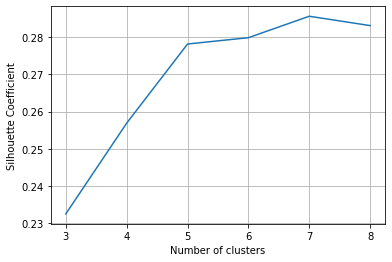

In [1965]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [1966]:
# based on sc score, the solution K=7, the second solution can be k=8

In [1967]:
data_scaled.cluster_7.value_counts()/sum(data_scaled.cluster_7.value_counts())

5    0.320396
0    0.236368
4    0.189670
2    0.098349
3    0.088623
1    0.047469
6    0.019124
Name: cluster_7, dtype: float64

In [1968]:
data_scaled.cluster_8.value_counts()/sum(data_scaled.cluster_8.value_counts())

0    0.309930
6    0.205948
7    0.157856
3    0.094198
5    0.086785
1    0.086044
4    0.045720
2    0.013520
Name: cluster_8, dtype: float64

In [1969]:
#Profiling
size=pd.concat([pd.Series(data_scaled.cluster_3.size), pd.Series.sort_index(data_scaled.cluster_3.value_counts()), pd.Series.sort_index(data_scaled.cluster_4.value_counts()),
           pd.Series.sort_index(data_scaled.cluster_5.value_counts()), pd.Series.sort_index(data_scaled.cluster_6.value_counts()),
           pd.Series.sort_index(data_scaled.cluster_7.value_counts()), pd.Series.sort_index(data_scaled.cluster_8.value_counts())])

In [1970]:
size

0    33727
0    12646
1     3263
2    17818
0     9481
1     8198
2     3011
3    13037
0     8641
1     7196
2     2812
3    11538
4     3540
0     3352
1     2985
2     6840
3     8053
4     1591
5    10906
0     7972
1     1601
2     3317
3     2989
4     6397
5    10806
6      645
0    10453
1     2902
2      456
3     3177
4     1542
5     2927
6     6946
7     5324
dtype: int64

In [1971]:
Seg_size=pd.DataFrame(size, columns=['Seg_size'])
Seg_Pct = pd.DataFrame(size/data_scaled.cluster_7.size, columns=['Seg_Pct'])

In [1972]:
Seg_Pct.T

,0,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5,0,1,2,3,4,5,6,0,1,2,3,4,5,6,7
Seg_Pct,1.0,0.374952,0.096747,0.528301,0.28111,0.243069,0.089276,0.386545,0.256204,0.21336,0.083375,0.3421,0.10496,0.099386,0.088505,0.202805,0.23877,0.047173,0.323361,0.236368,0.047469,0.098349,0.088623,0.18967,0.320396,0.019124,0.30993,0.086044,0.01352,0.094198,0.04572,0.086785,0.205948,0.157856


In [1973]:
data_scaled.apply(np.mean).T

FICO                        -4.008432e-15
Business_Revenue             4.114083e-17
Last_6M_Avg_Util             6.657882e-16
Income                      -4.289420e-16
Last_6M_Avg_Bal              5.933062e-16
Lending_AR_pct_in_last_6M    3.400353e-15
ExternalBalance              4.794167e-16
Months_in_Business           5.223384e-16
total_cards                  1.087279e-16
preferred_bal_line           2.545000e-16
preavgremit1_3_all          -7.435173e-17
Supplementary_Cards          4.137514e-15
isChargeCust                -4.546954e-16
CMV                         -1.885276e-16
cluster_3                    1.153349e+00
cluster_4                    1.581255e+00
cluster_5                    1.826252e+00
cluster_6                    3.015922e+00
cluster_7                    2.985442e+00
cluster_8                    3.353159e+00
dtype: float64

In [1974]:
data_scaled.groupby('cluster_8').apply(np.mean).T

cluster_8,0,1,2,3,4,5,6,7
FICO,0.628082,-0.135662,0.175009,0.302246,-0.223753,-1.033568,-1.118439,0.737653
Business_Revenue,-0.141333,0.177977,0.560065,0.214452,0.871046,-0.052065,-0.169091,0.001485
Last_6M_Avg_Util,-0.272529,0.835821,0.140291,-0.246642,0.910316,0.125974,0.067747,-0.206650
Income,-0.175796,0.423819,0.469576,0.368727,1.041497,-0.102850,-0.259504,-0.052655
Last_6M_Avg_Bal,-0.385619,1.364342,0.513188,-0.203155,3.276500,-0.245350,-0.321952,-0.303340
Lending_AR_pct_in_last_6M,0.039353,-0.013218,-0.034513,0.006762,-0.417579,0.036054,-0.075868,0.128966
ExternalBalance,-0.272566,0.153432,0.125999,0.754749,0.473939,0.112813,0.026000,-0.242869
Months_in_Business,0.009898,-0.075537,0.214701,0.194215,0.006663,-0.081469,-0.180712,0.166083
total_cards,-0.101837,0.416251,0.202415,-0.035163,0.996248,-0.139072,-0.014551,-0.216403
preferred_bal_line,-0.258668,-0.021966,0.297459,2.127440,0.631260,-0.377154,-0.457544,-0.153698


In [1975]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
Profling_output = pd.concat([data_scaled.apply(lambda x: x.mean()).T, data_scaled.groupby('cluster_3').apply(lambda x: x.mean()).T, data_scaled.groupby('cluster_4').apply(lambda x: x.mean()).T,
          data_scaled.groupby('cluster_5').apply(lambda x: x.mean()).T, data_scaled.groupby('cluster_6').apply(lambda x: x.mean()).T,
          data_scaled.groupby('cluster_7').apply(lambda x: x.mean()).T, data_scaled.groupby('cluster_8').apply(lambda x: x.mean()).T], axis=1)


In [1976]:
Profling_output

,0,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5,0,1,2,3,4,5,6,0,1,2,3,4,5,6,7
FICO,-4.008432e-15,-0.924914,-0.195372,0.692219,-1.160017,0.471957,-0.211812,0.595749,-1.212571,0.454637,-0.220628,0.585068,0.303997,0.315250,-0.208859,0.471474,-1.220639,-0.186877,0.593157,-1.226203,-0.213535,0.312692,-0.176898,0.495935,0.594131,0.024853,0.628082,-0.135662,0.175009,0.302246,-0.223753,-1.033568,-1.118439,0.737653
Business_Revenue,4.114083e-17,-0.125385,0.605337,-0.021865,-0.128949,0.055225,0.616419,-0.083317,-0.138849,0.019725,0.623631,-0.129789,0.226472,0.219774,0.184036,0.013546,-0.154070,0.885871,-0.141883,-0.155345,0.856810,0.212172,0.154955,-0.018285,-0.143164,0.563907,-0.141333,0.177977,0.560065,0.214452,0.871046,-0.052065,-0.169091,0.001485
Last_6M_Avg_Util,6.657882e-16,0.092900,0.894725,-0.229785,0.146946,-0.123596,0.908839,-0.239048,0.162441,-0.097393,0.927598,-0.222457,-0.210314,-0.246392,0.850904,-0.146997,0.096775,0.903441,-0.268227,0.095645,0.913186,-0.249457,0.822556,-0.176753,-0.274046,0.366467,-0.272529,0.835821,0.140291,-0.246642,0.910316,0.125974,0.067747,-0.206650
Income,-4.289420e-16,-0.193151,0.806630,-0.010632,-0.202864,0.044555,0.831118,-0.072441,-0.207667,-0.020534,0.834105,-0.148294,0.369415,0.367403,0.423615,-0.043524,-0.237593,1.047761,-0.178982,-0.238313,1.017838,0.362345,0.409869,-0.077355,-0.181678,0.467183,-0.175796,0.423819,0.469576,0.368727,1.041497,-0.102850,-0.259504,-0.052655
Last_6M_Avg_Bal,5.933062e-16,-0.241889,2.503213,-0.286735,-0.226416,-0.209455,2.606027,-0.305514,-0.220506,-0.203232,2.694546,-0.315987,-0.159138,-0.207970,1.356090,-0.267938,-0.316626,3.275258,-0.383208,-0.320110,3.243661,-0.213318,1.284779,-0.312541,-0.391250,0.702877,-0.385619,1.364342,0.513188,-0.203155,3.276500,-0.245350,-0.321952,-0.303340
Lending_AR_pct_in_last_6M,3.400353e-15,-0.037211,-0.235793,0.069591,-0.047698,0.110721,-0.248731,0.022510,-0.050637,0.106243,-0.263423,0.034004,0.006057,0.009884,-0.008368,0.104543,-0.052130,-0.418564,0.033240,-0.053179,-0.412806,0.007168,0.000958,0.107416,0.033935,0.006764,0.039353,-0.013218,-0.034513,0.006762,-0.417579,0.036054,-0.075868,0.128966
ExternalBalance,4.794167e-16,0.037406,0.417751,-0.103050,0.077983,-0.038876,0.428478,-0.131226,0.068105,-0.176608,0.405307,-0.262397,0.726042,0.739497,0.169852,-0.181398,0.049138,0.468332,-0.264612,0.049969,0.469645,0.728190,0.138752,-0.195073,-0.265265,0.207678,-0.272566,0.153432,0.125999,0.754749,0.473939,0.112813,0.026000,-0.242869
Months_in_Business,5.223384e-16,-0.160746,-0.004187,0.114853,-0.161374,0.148650,-0.011122,0.026451,-0.168179,0.119756,-0.013328,-0.003140,0.187904,0.196390,-0.078313,0.125424,-0.167837,0.019524,0.003493,-0.168171,0.002865,0.196748,-0.083740,0.119895,0.003708,0.196453,0.009898,-0.075537,0.214701,0.194215,0.006663,-0.081469,-0.180712,0.166083
total_cards,1.087279e-16,-0.022652,0.739067,-0.119268,-0.010571,-0.164745,0.770147,-0.066588,-0.009068,-0.167717,0.790003,-0.078814,-0.007595,-0.029313,0.408522,-0.186098,-0.043848,0.995843,-0.098987,-0.045125,0.990958,-0.030952,0.395196,-0.207432,-0.101540,0.184215,-0.101837,0.416251,0.202415,-0.035163,0.996248,-0.139072,-0.014551,-0.216403
preferred_bal_line,2.545000e-16,-0.416650,0.470842,0.209485,-0.411057,0.148532,0.485743,0.093350,-0.444740,-0.194302,0.393012,-0.267771,2.041126,2.090777,-0.030311,-0.194013,-0.461553,0.646009,-0.266062,-0.462473,0.613655,2.087163,-0.043106,-0.213824,-0.268082,0.271053,-0.258668,-0.021966,0.297459,2.127440,0.631260,-0.377154,-0.457544,-0.153698


In [1977]:
Profling_output_final=pd.concat([Seg_size.T, Seg_Pct.T, Profling_output], axis=0)

In [1978]:
Profling_output_final

,0,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5,0,1,2,3,4,5,6,0,1,2,3,4,5,6,7
Seg_size,3.372700e+04,12646.000000,3263.000000,17818.000000,9481.000000,8198.000000,3011.000000,13037.000000,8641.000000,7196.000000,2812.000000,11538.000000,3540.000000,3352.000000,2985.000000,6840.000000,8053.000000,1591.000000,10906.000000,7972.000000,1601.000000,3317.000000,2989.000000,6397.000000,10806.000000,645.000000,10453.000000,2902.000000,456.000000,3177.000000,1542.000000,2927.000000,6946.000000,5324.000000
Seg_Pct,1.000000e+00,0.374952,0.096747,0.528301,0.281110,0.243069,0.089276,0.386545,0.256204,0.213360,0.083375,0.342100,0.104960,0.099386,0.088505,0.202805,0.238770,0.047173,0.323361,0.236368,0.047469,0.098349,0.088623,0.189670,0.320396,0.019124,0.309930,0.086044,0.013520,0.094198,0.045720,0.086785,0.205948,0.157856
FICO,-4.008432e-15,-0.924914,-0.195372,0.692219,-1.160017,0.471957,-0.211812,0.595749,-1.212571,0.454637,-0.220628,0.585068,0.303997,0.315250,-0.208859,0.471474,-1.220639,-0.186877,0.593157,-1.226203,-0.213535,0.312692,-0.176898,0.495935,0.594131,0.024853,0.628082,-0.135662,0.175009,0.302246,-0.223753,-1.033568,-1.118439,0.737653
Business_Revenue,4.114083e-17,-0.125385,0.605337,-0.021865,-0.128949,0.055225,0.616419,-0.083317,-0.138849,0.019725,0.623631,-0.129789,0.226472,0.219774,0.184036,0.013546,-0.154070,0.885871,-0.141883,-0.155345,0.856810,0.212172,0.154955,-0.018285,-0.143164,0.563907,-0.141333,0.177977,0.560065,0.214452,0.871046,-0.052065,-0.169091,0.001485
Last_6M_Avg_Util,6.657882e-16,0.092900,0.894725,-0.229785,0.146946,-0.123596,0.908839,-0.239048,0.162441,-0.097393,0.927598,-0.222457,-0.210314,-0.246392,0.850904,-0.146997,0.096775,0.903441,-0.268227,0.095645,0.913186,-0.249457,0.822556,-0.176753,-0.274046,0.366467,-0.272529,0.835821,0.140291,-0.246642,0.910316,0.125974,0.067747,-0.206650
Income,-4.289420e-16,-0.193151,0.806630,-0.010632,-0.202864,0.044555,0.831118,-0.072441,-0.207667,-0.020534,0.834105,-0.148294,0.369415,0.367403,0.423615,-0.043524,-0.237593,1.047761,-0.178982,-0.238313,1.017838,0.362345,0.409869,-0.077355,-0.181678,0.467183,-0.175796,0.423819,0.469576,0.368727,1.041497,-0.102850,-0.259504,-0.052655
Last_6M_Avg_Bal,5.933062e-16,-0.241889,2.503213,-0.286735,-0.226416,-0.209455,2.606027,-0.305514,-0.220506,-0.203232,2.694546,-0.315987,-0.159138,-0.207970,1.356090,-0.267938,-0.316626,3.275258,-0.383208,-0.320110,3.243661,-0.213318,1.284779,-0.312541,-0.391250,0.702877,-0.385619,1.364342,0.513188,-0.203155,3.276500,-0.245350,-0.321952,-0.303340
Lending_AR_pct_in_last_6M,3.400353e-15,-0.037211,-0.235793,0.069591,-0.047698,0.110721,-0.248731,0.022510,-0.050637,0.106243,-0.263423,0.034004,0.006057,0.009884,-0.008368,0.104543,-0.052130,-0.418564,0.033240,-0.053179,-0.412806,0.007168,0.000958,0.107416,0.033935,0.006764,0.039353,-0.013218,-0.034513,0.006762,-0.417579,0.036054,-0.075868,0.128966
ExternalBalance,4.794167e-16,0.037406,0.417751,-0.103050,0.077983,-0.038876,0.428478,-0.131226,0.068105,-0.176608,0.405307,-0.262397,0.726042,0.739497,0.169852,-0.181398,0.049138,0.468332,-0.264612,0.049969,0.469645,0.728190,0.138752,-0.195073,-0.265265,0.207678,-0.272566,0.153432,0.125999,0.754749,0.473939,0.112813,0.026000,-0.242869
Months_in_Business,5.223384e-16,-0.160746,-0.004187,0.114853,-0.161374,0.148650,-0.011122,0.026451,-0.168179,0.119756,-0.013328,-0.003140,0.187904,0.196390,-0.078313,0.125424,-0.167837,0.019524,0.003493,-0.168171,0.002865,0.196748,-0.083740,0.119895,0.003708,0.196453,0.009898,-0.075537,0.214701,0.194215,0.006663,-0.081469,-0.180712,0.166083


In [1979]:
#Profling_output_final.columns = ['Seg_' + str(i) for i in Profling_output_final.columns]
Profling_output_final.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                                'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7',
                                'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5','KM8_6','KM8_7','KM8_8',]

In [1980]:
Profling_output_final

,Overall,KM3_1,KM3_2,KM3_3,KM4_1,KM4_2,KM4_3,KM4_4,KM5_1,KM5_2,KM5_3,KM5_4,KM5_5,KM6_1,KM6_2,KM6_3,KM6_4,KM6_5,KM6_6,KM7_1,KM7_2,KM7_3,KM7_4,KM7_5,KM7_6,KM7_7,KM8_1,KM8_2,KM8_3,KM8_4,KM8_5,KM8_6,KM8_7,KM8_8
Seg_size,3.372700e+04,12646.000000,3263.000000,17818.000000,9481.000000,8198.000000,3011.000000,13037.000000,8641.000000,7196.000000,2812.000000,11538.000000,3540.000000,3352.000000,2985.000000,6840.000000,8053.000000,1591.000000,10906.000000,7972.000000,1601.000000,3317.000000,2989.000000,6397.000000,10806.000000,645.000000,10453.000000,2902.000000,456.000000,3177.000000,1542.000000,2927.000000,6946.000000,5324.000000
Seg_Pct,1.000000e+00,0.374952,0.096747,0.528301,0.281110,0.243069,0.089276,0.386545,0.256204,0.213360,0.083375,0.342100,0.104960,0.099386,0.088505,0.202805,0.238770,0.047173,0.323361,0.236368,0.047469,0.098349,0.088623,0.189670,0.320396,0.019124,0.309930,0.086044,0.013520,0.094198,0.045720,0.086785,0.205948,0.157856
FICO,-4.008432e-15,-0.924914,-0.195372,0.692219,-1.160017,0.471957,-0.211812,0.595749,-1.212571,0.454637,-0.220628,0.585068,0.303997,0.315250,-0.208859,0.471474,-1.220639,-0.186877,0.593157,-1.226203,-0.213535,0.312692,-0.176898,0.495935,0.594131,0.024853,0.628082,-0.135662,0.175009,0.302246,-0.223753,-1.033568,-1.118439,0.737653
Business_Revenue,4.114083e-17,-0.125385,0.605337,-0.021865,-0.128949,0.055225,0.616419,-0.083317,-0.138849,0.019725,0.623631,-0.129789,0.226472,0.219774,0.184036,0.013546,-0.154070,0.885871,-0.141883,-0.155345,0.856810,0.212172,0.154955,-0.018285,-0.143164,0.563907,-0.141333,0.177977,0.560065,0.214452,0.871046,-0.052065,-0.169091,0.001485
Last_6M_Avg_Util,6.657882e-16,0.092900,0.894725,-0.229785,0.146946,-0.123596,0.908839,-0.239048,0.162441,-0.097393,0.927598,-0.222457,-0.210314,-0.246392,0.850904,-0.146997,0.096775,0.903441,-0.268227,0.095645,0.913186,-0.249457,0.822556,-0.176753,-0.274046,0.366467,-0.272529,0.835821,0.140291,-0.246642,0.910316,0.125974,0.067747,-0.206650
Income,-4.289420e-16,-0.193151,0.806630,-0.010632,-0.202864,0.044555,0.831118,-0.072441,-0.207667,-0.020534,0.834105,-0.148294,0.369415,0.367403,0.423615,-0.043524,-0.237593,1.047761,-0.178982,-0.238313,1.017838,0.362345,0.409869,-0.077355,-0.181678,0.467183,-0.175796,0.423819,0.469576,0.368727,1.041497,-0.102850,-0.259504,-0.052655
Last_6M_Avg_Bal,5.933062e-16,-0.241889,2.503213,-0.286735,-0.226416,-0.209455,2.606027,-0.305514,-0.220506,-0.203232,2.694546,-0.315987,-0.159138,-0.207970,1.356090,-0.267938,-0.316626,3.275258,-0.383208,-0.320110,3.243661,-0.213318,1.284779,-0.312541,-0.391250,0.702877,-0.385619,1.364342,0.513188,-0.203155,3.276500,-0.245350,-0.321952,-0.303340
Lending_AR_pct_in_last_6M,3.400353e-15,-0.037211,-0.235793,0.069591,-0.047698,0.110721,-0.248731,0.022510,-0.050637,0.106243,-0.263423,0.034004,0.006057,0.009884,-0.008368,0.104543,-0.052130,-0.418564,0.033240,-0.053179,-0.412806,0.007168,0.000958,0.107416,0.033935,0.006764,0.039353,-0.013218,-0.034513,0.006762,-0.417579,0.036054,-0.075868,0.128966
ExternalBalance,4.794167e-16,0.037406,0.417751,-0.103050,0.077983,-0.038876,0.428478,-0.131226,0.068105,-0.176608,0.405307,-0.262397,0.726042,0.739497,0.169852,-0.181398,0.049138,0.468332,-0.264612,0.049969,0.469645,0.728190,0.138752,-0.195073,-0.265265,0.207678,-0.272566,0.153432,0.125999,0.754749,0.473939,0.112813,0.026000,-0.242869
Months_in_Business,5.223384e-16,-0.160746,-0.004187,0.114853,-0.161374,0.148650,-0.011122,0.026451,-0.168179,0.119756,-0.013328,-0.003140,0.187904,0.196390,-0.078313,0.125424,-0.167837,0.019524,0.003493,-0.168171,0.002865,0.196748,-0.083740,0.119895,0.003708,0.196453,0.009898,-0.075537,0.214701,0.194215,0.006663,-0.081469,-0.180712,0.166083


In [1981]:
Profling_output_final.to_csv('Profling_output_final.csv')

In [1982]:
# Elbow Analysis 

In [1983]:
cluster_range = range( 1, 12 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( data_scaled )
    cluster_errors.append( clusters.inertia_ )



In [1984]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df

,num_clusters,cluster_errors
0,1,1.115459e+06
1,2,7.461404e+05
2,3,5.903602e+05
3,4,4.878740e+05
4,5,4.357969e+05
5,6,4.026328e+05
6,7,3.869292e+05
7,8,3.776071e+05
8,9,3.661359e+05
9,10,3.550203e+05


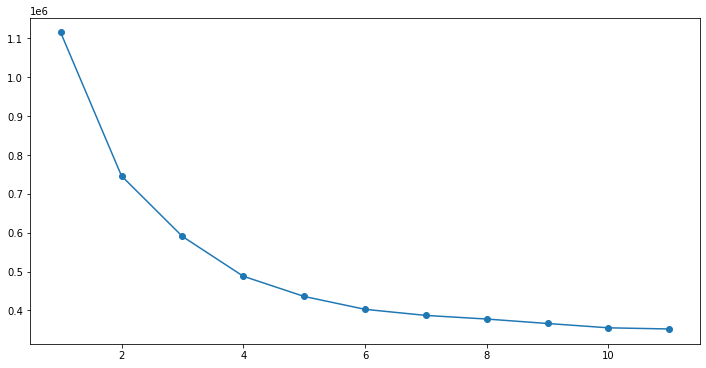

In [1985]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [1986]:
# The elbow diagram shows that the gain in explained variance reduces significantly from 6 to 8. 
# So, optimal number of clusters could either 6 or 7 or 8. 
# The actual number of clusters chosen can be finally based on business context and convenience of dealing with number of segments or clusters.

In [1987]:
# saving the model

import pickle

# now you can save it to a file
with open('km_8model.pkl', 'wb') as f:
    pickle.dump(km_8, f)

In [1988]:
# using new data for the segmentation
new_data.head()

,FICO,Business_Revenue,Last_6M_Avg_Util,Income,Last_6M_Avg_Bal,Lending_AR_pct_in_last_6M,ExternalBalance,Months_in_Business,total_cards,preferred_bal_line,preavgremit1_3_all,Supplementary_Cards,isChargeCust,CMV
0,878.823529,0.833333,620.835806,5.181818,197.500187,58.632548,9.433609,40.033361,2,10.000000,1.212784,1,0,80.159862
1,891.764706,0.138889,614.092215,3.909091,197.016843,58.632548,10.144612,80.066722,1,7.600000,1.004907,0,0,104.018933
2,955.294118,0.055556,611.574748,6.363636,197.660051,58.632548,0.583494,80.066722,1,6.000000,1.157115,1,1,120.586919
3,831.764706,0.111111,617.740617,6.545455,200.526288,48.539365,2.105289,80.066722,3,10.166667,2.350858,0,1,168.592083
4,957.647059,0.166667,623.426802,10.090909,197.151458,49.379748,0.255712,80.066722,1,13.333333,1.171551,0,1,109.204819


In [1989]:
# transformation on new data
std_model.transform(new_data)

array([[-0.82509203,  0.31778278, -0.37423208, ...,  0.87393351,
        -0.65441798, -0.78203305],
       [-0.55458754, -0.43886831, -0.6300001 , ..., -0.58436628,
        -0.65441798, -0.53710278],
       [ 0.77334359, -0.52966644, -0.72548151, ...,  0.87393351,
         1.52807537, -0.36702066],
       ...,
       [ 0.87170886, -0.40860227,  0.09427756, ..., -0.58436628,
        -0.65441798, -0.44184902],
       [ 0.42906515, -0.40860227, -0.59095763, ...,  0.87393351,
         1.52807537, -0.32005637],
       [ 1.60944837, -0.40860227, -0.67581524, ...,  0.87393351,
        -0.65441798, -0.54915307]])

In [1990]:
data_scaled_new = pd.DataFrame(std_model.transform(new_data), columns = new_data.columns)

In [1991]:
# selected variables
selected_vars = ['Last_6M_Avg_Bal',
                 'preavgremit1_3_all',
                 'preferred_bal_line',
                 'FICO',
                 'Supplementary_Cards']

In [1992]:
input_segmentation = data_scaled_new[selected_vars]

In [1993]:
km_8.predict(input_segmentation)

array([5, 6, 7, ..., 0, 7, 7])

In [1994]:
new_data['segment'] = km_8.predict(input_segmentation)

In [1995]:
new_data.head()

,FICO,Business_Revenue,Last_6M_Avg_Util,Income,Last_6M_Avg_Bal,Lending_AR_pct_in_last_6M,ExternalBalance,Months_in_Business,total_cards,preferred_bal_line,preavgremit1_3_all,Supplementary_Cards,isChargeCust,CMV,segment
0,878.823529,0.833333,620.835806,5.181818,197.500187,58.632548,9.433609,40.033361,2,10.000000,1.212784,1,0,80.159862,5
1,891.764706,0.138889,614.092215,3.909091,197.016843,58.632548,10.144612,80.066722,1,7.600000,1.004907,0,0,104.018933,6
2,955.294118,0.055556,611.574748,6.363636,197.660051,58.632548,0.583494,80.066722,1,6.000000,1.157115,1,1,120.586919,7
3,831.764706,0.111111,617.740617,6.545455,200.526288,48.539365,2.105289,80.066722,3,10.166667,2.350858,0,1,168.592083,6
4,957.647059,0.166667,623.426802,10.090909,197.151458,49.379748,0.255712,80.066722,1,13.333333,1.171551,0,1,109.204819,0


In [1996]:
new_data.segment.value_counts()

0    3095
6    2040
7    1605
3     942
1     848
5     812
4     453
2     139
Name: segment, dtype: int64